In [1]:
import os
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
import itertools

import matplotlib.pyplot as plt
import seaborn as sns
import anndata

from scroutines import basicu
from scroutines.config_plots import *
import importlib
importlib.reload(basicu)

<module 'scroutines.basicu' from '/scr/qlyu/projects/v1/scroutines/scroutines/basicu.py'>

In [2]:
sns.set_context('talk')

In [3]:
def get_pbulks(ddir, files, ncond, nrep, nclst, ngene):
    """
    """
    pbulks = []
    xclsts = []
    xcnsts = []
    for f in files:
        print(f)

        path = os.path.join(ddir, f)
        adata = anndata.read(path)
        genes = adata.var.index.values

        # adata = adata[adata.obs['Subclass'] == 'L2/3']
        mat = adata.X
        types = adata.obs['Type'].astype(str).values 
        # 1 or 2
        sample_codes = adata.obs['sample'].apply(lambda x: x.split('_')[-1][:-1].replace('3', '2')).astype(str).values
        sample_and_type = sample_codes + "_" + types
        unqs, cnts = np.unique(sample_and_type, return_counts=True)
        _xclsts, Xk, Xk_n, Xk_ln = basicu.counts_to_bulk_profiles(mat, sample_and_type) 

        # check all types + reps are the same
        if len(xclsts) > 0:
            if not np.all(_xclsts == xclsts):
                raise ValueError(_xclsts.shape, xclsts.shape, _xclsts, xclsts,)
            if not np.all(_xclsts == unqs):
                raise ValueError(_xclsts.shape, unqs.shape, _xclsts, unqs,)
        else:
            xclsts = _xclsts
            print(xclsts)

        pbulks.append(Xk_ln)
        xcnsts.append(cnts)

    pbulks = np.array(pbulks)
    xcnsts = np.array(xcnsts)
    
    pbulks = pbulks.reshape(ncond,nrep,nclst,-1)
    xclsts = xclsts.reshape(      nrep,nclst)
    xcnsts = xcnsts.reshape(ncond,nrep,nclst)
    
    return pbulks, xcnsts, xclsts, genes

# get data

In [4]:
ddir = '../data/cheng21_cell_scrna/organized/'

In [7]:
files = [
    # 'P8NR.h5ad',
    
    'P14NR.h5ad',
    
    # 'P17NR.h5ad',
    # 'P21NR.h5ad',
    # 'P28NR.h5ad',
    # 'P38NR.h5ad',
    
    # 'P28DR.h5ad',
    # 'P38DR.h5ad',
    
    # 'P28DL.h5ad',
] 
# conds = np.array([f.replace('.h5ad', '') for f in files])

ncond, nrep, nclst, ngene = len(files), 2, 40, -1
pbulks_nr, xcnsts, xclsts, genes = get_pbulks(ddir, files, ncond, nrep, nclst, ngene)

xclsts_short = np.array([clst[len("1_"):] for clst in xclsts[0]]) #, '_'
numcells = pd.DataFrame(xcnsts.T.reshape(-1,nrep*ncond), index=xclsts_short)
numcells

P14NR.h5ad
['1_Astro_A' '1_Astro_B' '1_Endo' '1_Frem1' '1_L2/3_AB' '1_L2/3_BC'
 '1_L4_A' '1_L4_B' '1_L4_C' '1_L5IT' '1_L5NP' '1_L5PT_A' '1_L5PT_B'
 '1_L6CT_A' '1_L6CT_B' '1_L6CT_C' '1_L6IT_A' '1_L6IT_B' '1_L6b' '1_Lamp5'
 '1_Micro' '1_OD_A' '1_OD_B' '1_OPC_A' '1_OPC_B' '1_Pvalb_A' '1_Pvalb_B'
 '1_Pvalb_C' '1_Pvalb_D' '1_Sst_A' '1_Sst_B' '1_Sst_C' '1_Sst_D' '1_Sst_E'
 '1_Stac' '1_VLMC_A' '1_VLMC_B' '1_Vip_A' '1_Vip_B' '1_Vip_C' '2_Astro_A'
 '2_Astro_B' '2_Endo' '2_Frem1' '2_L2/3_AB' '2_L2/3_BC' '2_L4_A' '2_L4_B'
 '2_L4_C' '2_L5IT' '2_L5NP' '2_L5PT_A' '2_L5PT_B' '2_L6CT_A' '2_L6CT_B'
 '2_L6CT_C' '2_L6IT_A' '2_L6IT_B' '2_L6b' '2_Lamp5' '2_Micro' '2_OD_A'
 '2_OD_B' '2_OPC_A' '2_OPC_B' '2_Pvalb_A' '2_Pvalb_B' '2_Pvalb_C'
 '2_Pvalb_D' '2_Sst_A' '2_Sst_B' '2_Sst_C' '2_Sst_D' '2_Sst_E' '2_Stac'
 '2_VLMC_A' '2_VLMC_B' '2_Vip_A' '2_Vip_B' '2_Vip_C']


0     1
Astro_A  1272   943
Astro_B   368   228
Endo      254   118
Frem1      50    34
L2/3_AB  2562  1770
L2/3_BC  1125   790
L4_A     1266   958
L4_B     1620  1147
L4_C      496   423
L5IT      599   454
L5NP      319   203
L5PT_A    435   369
L5PT_B     87    87
L6CT_A    153    82
L6CT_B   1444   999
L6CT_C    748   528
L6IT_A   1021   685
L6IT_B    233   184
L6b       238   195
Lamp5     196   153
Micro     822   538
OD_A      439   299
OD_B      187   124
OPC_A     880   557
OPC_B     109    58
Pvalb_A   225   153
Pvalb_B   158   122
Pvalb_C   104    90
Pvalb_D    94    71
Sst_A     165    99
Sst_B      86    72
Sst_C      96    55
Sst_D      97    62
Sst_E      67    47
Stac       44    29
VLMC_A    167    42
VLMC_B    210    93
Vip_A     102    88
Vip_B      96    58
Vip_C      78    53

In [8]:
pbulks_nr.shape 

(1, 2, 40, 53801)

# check microglia

In [9]:
f = "../results/MERFISH_gene_panel_Current_Mar7_v5.csv"
df = pd.read_csv(f)
# df = df[df['why included'].str.contains('All cell types') & 
#         df['source'].str.contains('analysis')
#        ]
df = df[df['why included'].str.contains('Microglia')
        # & df['source'].str.contains('analysis')
       ]
cnddts = df['gene_name_data'].values
unq, cnts = np.unique(cnddts, return_counts=True)
print(len(cnddts), unq.shape, unq[cnts>1], [g for g in cnddts if g not in genes])

gidx = basicu.get_index_from_array(genes, cnddts)
assert np.all(gidx!=-1)

60 (60,) [] []


In [10]:
exp = np.mean(pbulks_nr[:,:,:,gidx], axis=(0,1)).T # [0,0,:,:].T #.shape
lfc = exp - np.mean(exp, axis=1).reshape(-1,1)
rowidx = basicu.order_by_hc(lfc)
colidx = basicu.order_by_hc(lfc.T)

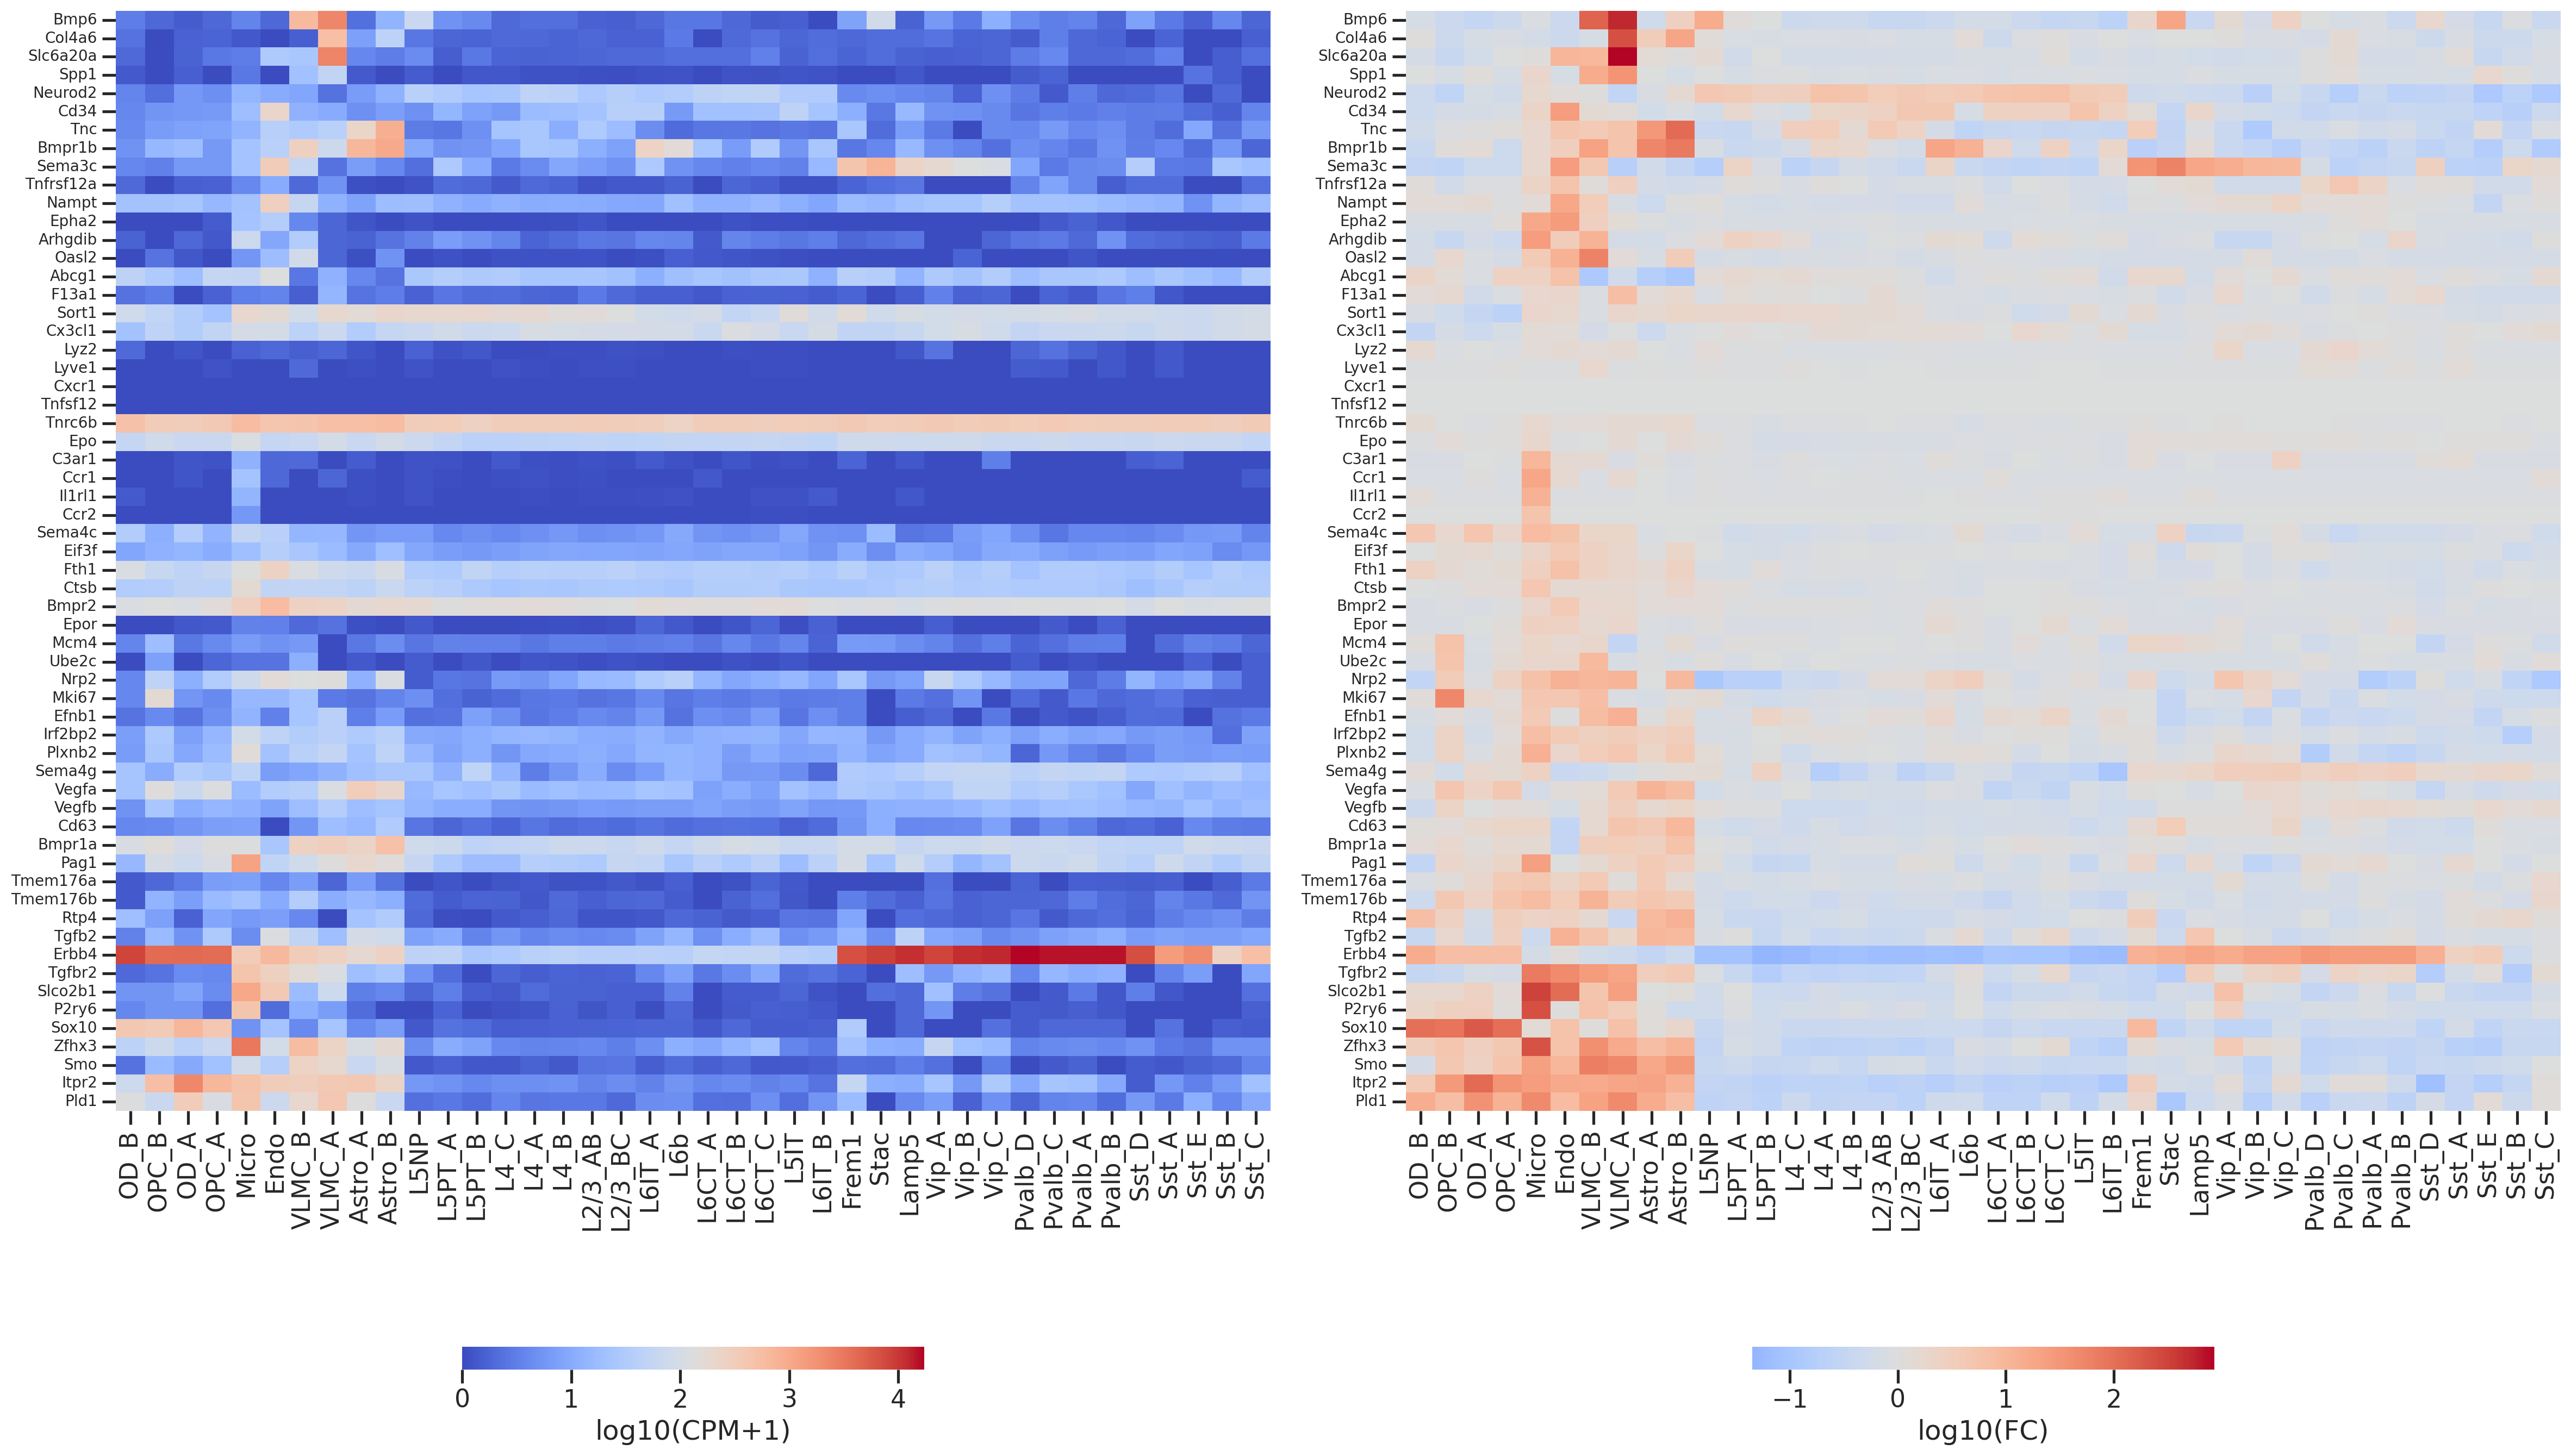

In [11]:
fig, axs = plt.subplots(1,2,figsize=(12*2,15))
ax = axs[0]
sns.heatmap(
    exp[rowidx,:][:,colidx],
    yticklabels=cnddts[rowidx],
    xticklabels=xclsts_short[colidx],
    cmap='coolwarm',
    cbar_kws=dict(shrink=0.4, label='log10(CPM+1)', location='bottom'),
    ax=ax,
    )
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)

ax = axs[1]
sns.heatmap(
    lfc[rowidx,:][:,colidx],
    yticklabels=cnddts[rowidx],
    xticklabels=xclsts_short[colidx],
    cmap='coolwarm',
    cbar_kws=dict(shrink=0.4, label='log10(FC)', location='bottom'),
    center=0,
    ax=ax,
    )
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
fig.tight_layout()
plt.show()

In [12]:
genes_sub = np.array(['Neurod2', 'Erbb4', 'Sox10', 'Itpr2'])
gidx_sub = basicu.get_index_from_array(genes, genes_sub)
print(gidx_sub)

exp_sub = np.mean(pbulks_nr[:,:,:,gidx_sub], axis=(0,1)).T # [0,0,:,:].T #.shape
lfc_sub = exp_sub - np.mean(exp_sub, axis=1).reshape(-1,1)
rowidx_sub = basicu.order_by_hc(lfc_sub)
colidx_sub = basicu.order_by_hc(lfc_sub.T)

[39467  1110 46360 21922]


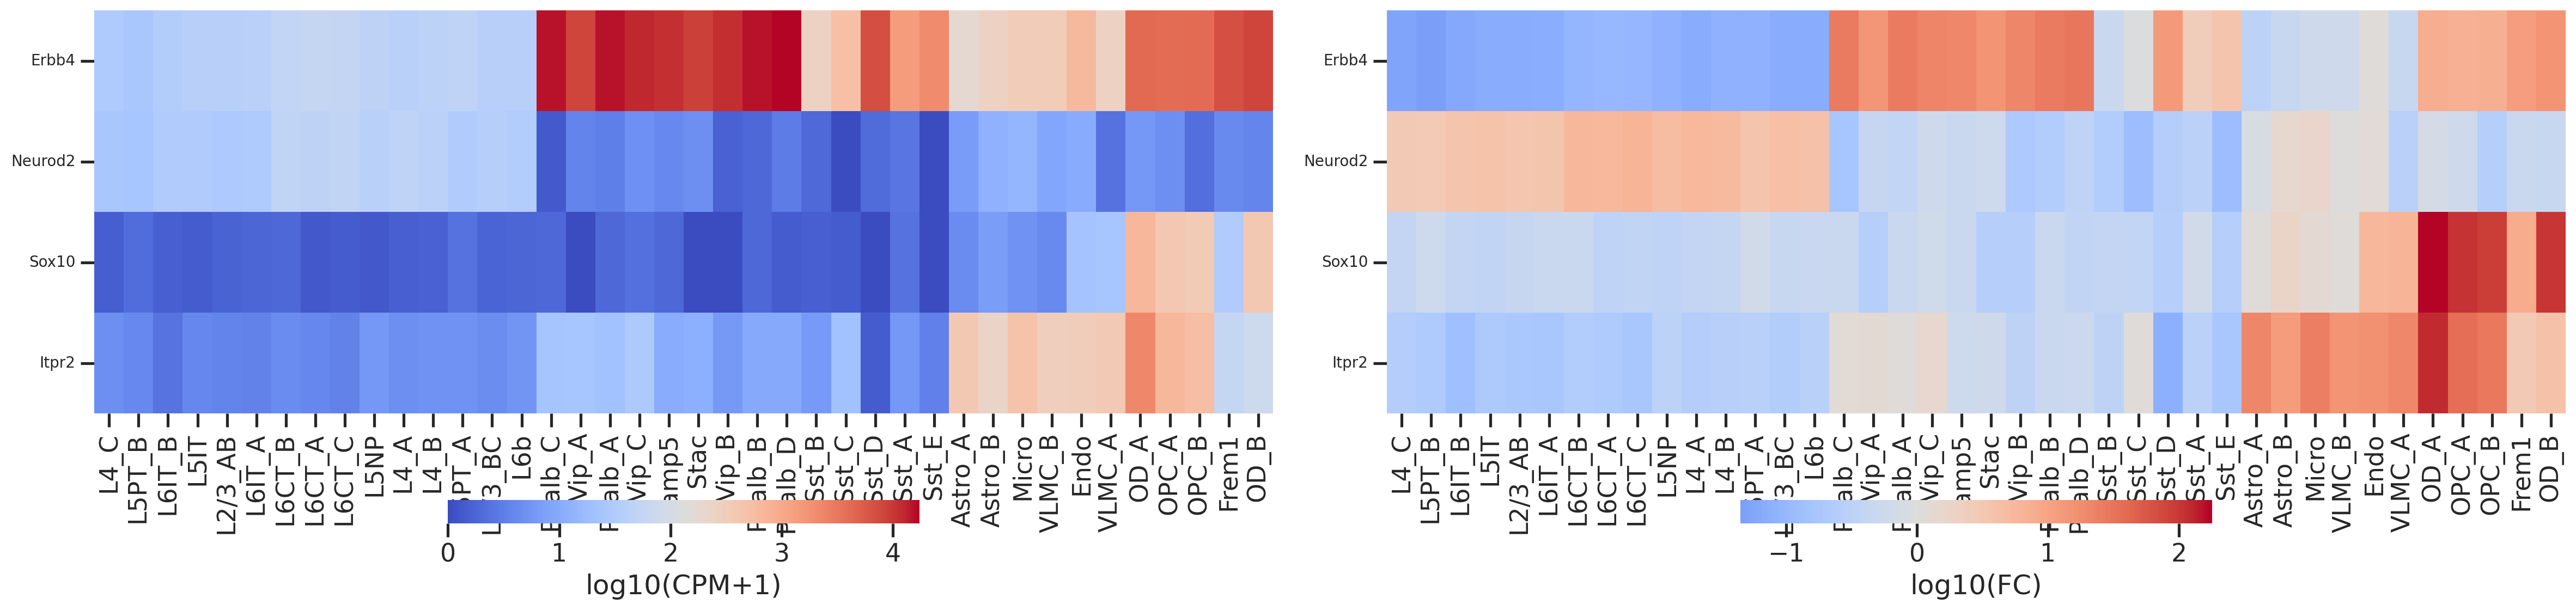

In [13]:
fig, axs = plt.subplots(1,2,figsize=(12*2,6))
ax = axs[0]
sns.heatmap(
    exp_sub[rowidx_sub,:][:,colidx_sub],
    yticklabels=genes_sub[rowidx_sub],
    xticklabels=xclsts_short[colidx_sub],
    cmap='coolwarm',
    cbar_kws=dict(shrink=0.4, label='log10(CPM+1)', location='bottom'),
    ax=ax,
    )
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)

ax = axs[1]
sns.heatmap(
    lfc_sub[rowidx_sub,:][:,colidx_sub],
    yticklabels=genes_sub[rowidx_sub],
    xticklabels=xclsts_short[colidx_sub],
    cmap='coolwarm',
    cbar_kws=dict(shrink=0.4, label='log10(FC)', location='bottom'),
    center=0,
    ax=ax,
    )
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
fig.tight_layout()
plt.show()

In [14]:
genes_sub = np.array([
    "Nampt",
    "Sema4g",
    "Tnc",
    "Tgfb2",
    "Bmp6",
    "Sema3c",
    "Sema4c",
    "Vegfa",
    "Vegfb",
    "Epo",
    "Efnb1",
])
gidx_sub = basicu.get_index_from_array(genes, genes_sub)
print(gidx_sub)

exp_sub = np.mean(pbulks_nr[:,:,:,gidx_sub], axis=(0,1)).T # [0,0,:,:].T #.shape
lfc_sub = exp_sub - np.mean(exp_sub, axis=1).reshape(-1,1)
rowidx_sub = basicu.order_by_hc(lfc_sub)
colidx_sub = basicu.order_by_hc(lfc_sub.T)

[43338 53478 13698  3280 41175 15881   520 49564 52792 18434  8726]


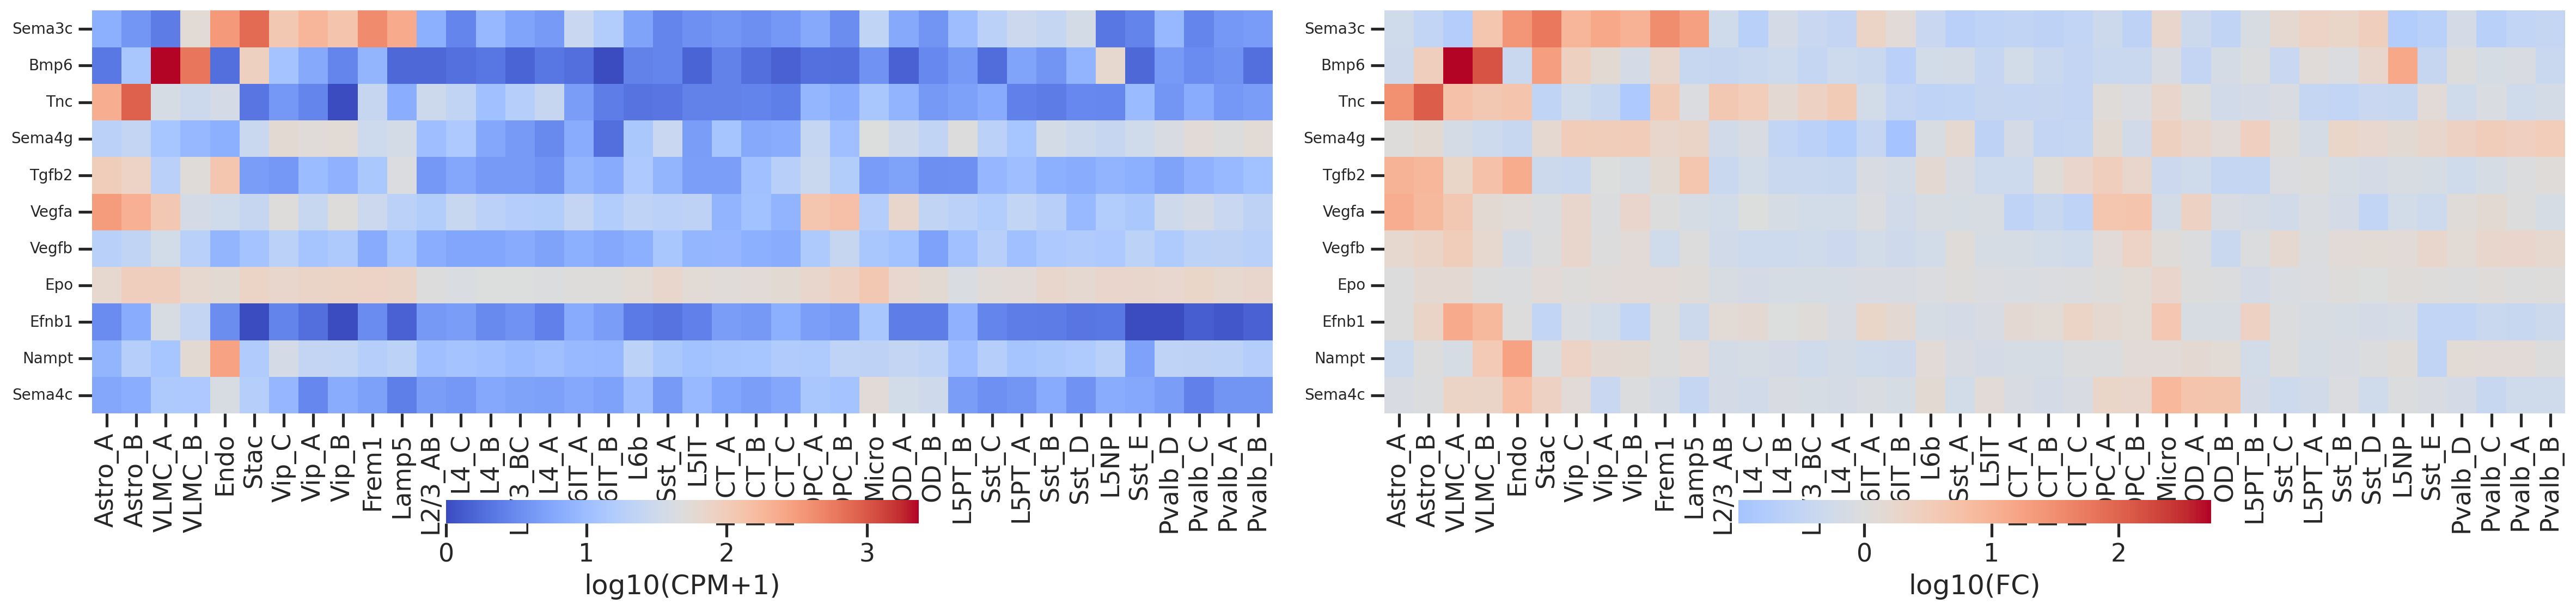

In [15]:
fig, axs = plt.subplots(1,2,figsize=(12*2,6))
ax = axs[0]
sns.heatmap(
    exp_sub[rowidx_sub,:][:,colidx_sub],
    yticklabels=genes_sub[rowidx_sub],
    xticklabels=xclsts_short[colidx_sub],
    cmap='coolwarm',
    cbar_kws=dict(shrink=0.4, label='log10(CPM+1)', location='bottom'),
    ax=ax,
    )
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)

ax = axs[1]
sns.heatmap(
    lfc_sub[rowidx_sub,:][:,colidx_sub],
    yticklabels=genes_sub[rowidx_sub],
    xticklabels=xclsts_short[colidx_sub],
    cmap='coolwarm',
    cbar_kws=dict(shrink=0.4, label='log10(FC)', location='bottom'),
    center=0,
    ax=ax,
    )
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
fig.tight_layout()
plt.show()

# Astrocytes

In [16]:
f = "../results/MERFISH_gene_panel_Current_Mar7_v5.csv"
df = pd.read_csv(f)
# df = df[df['why included'].str.contains('All cell types') & 
#         df['source'].str.contains('analysis')
#        ]
df = df[df['why included'].str.contains('Astrocytes')
        # & df['source'].str.contains('analysis')
       ]
cnddts = df['gene_name_data'].values
unq, cnts = np.unique(cnddts, return_counts=True)
print(len(cnddts), unq.shape, unq[cnts>1], [g for g in cnddts if g not in genes])

gidx = basicu.get_index_from_array(genes, cnddts)
assert np.all(gidx!=-1)

44 (44,) [] []


In [17]:
exp = np.mean(pbulks_nr[:,:,:,gidx], axis=(0,1)).T # [0,0,:,:].T #.shape
lfc = exp - np.mean(exp, axis=1).reshape(-1,1)
rowidx = basicu.order_by_hc(lfc)
colidx = basicu.order_by_hc(lfc.T)

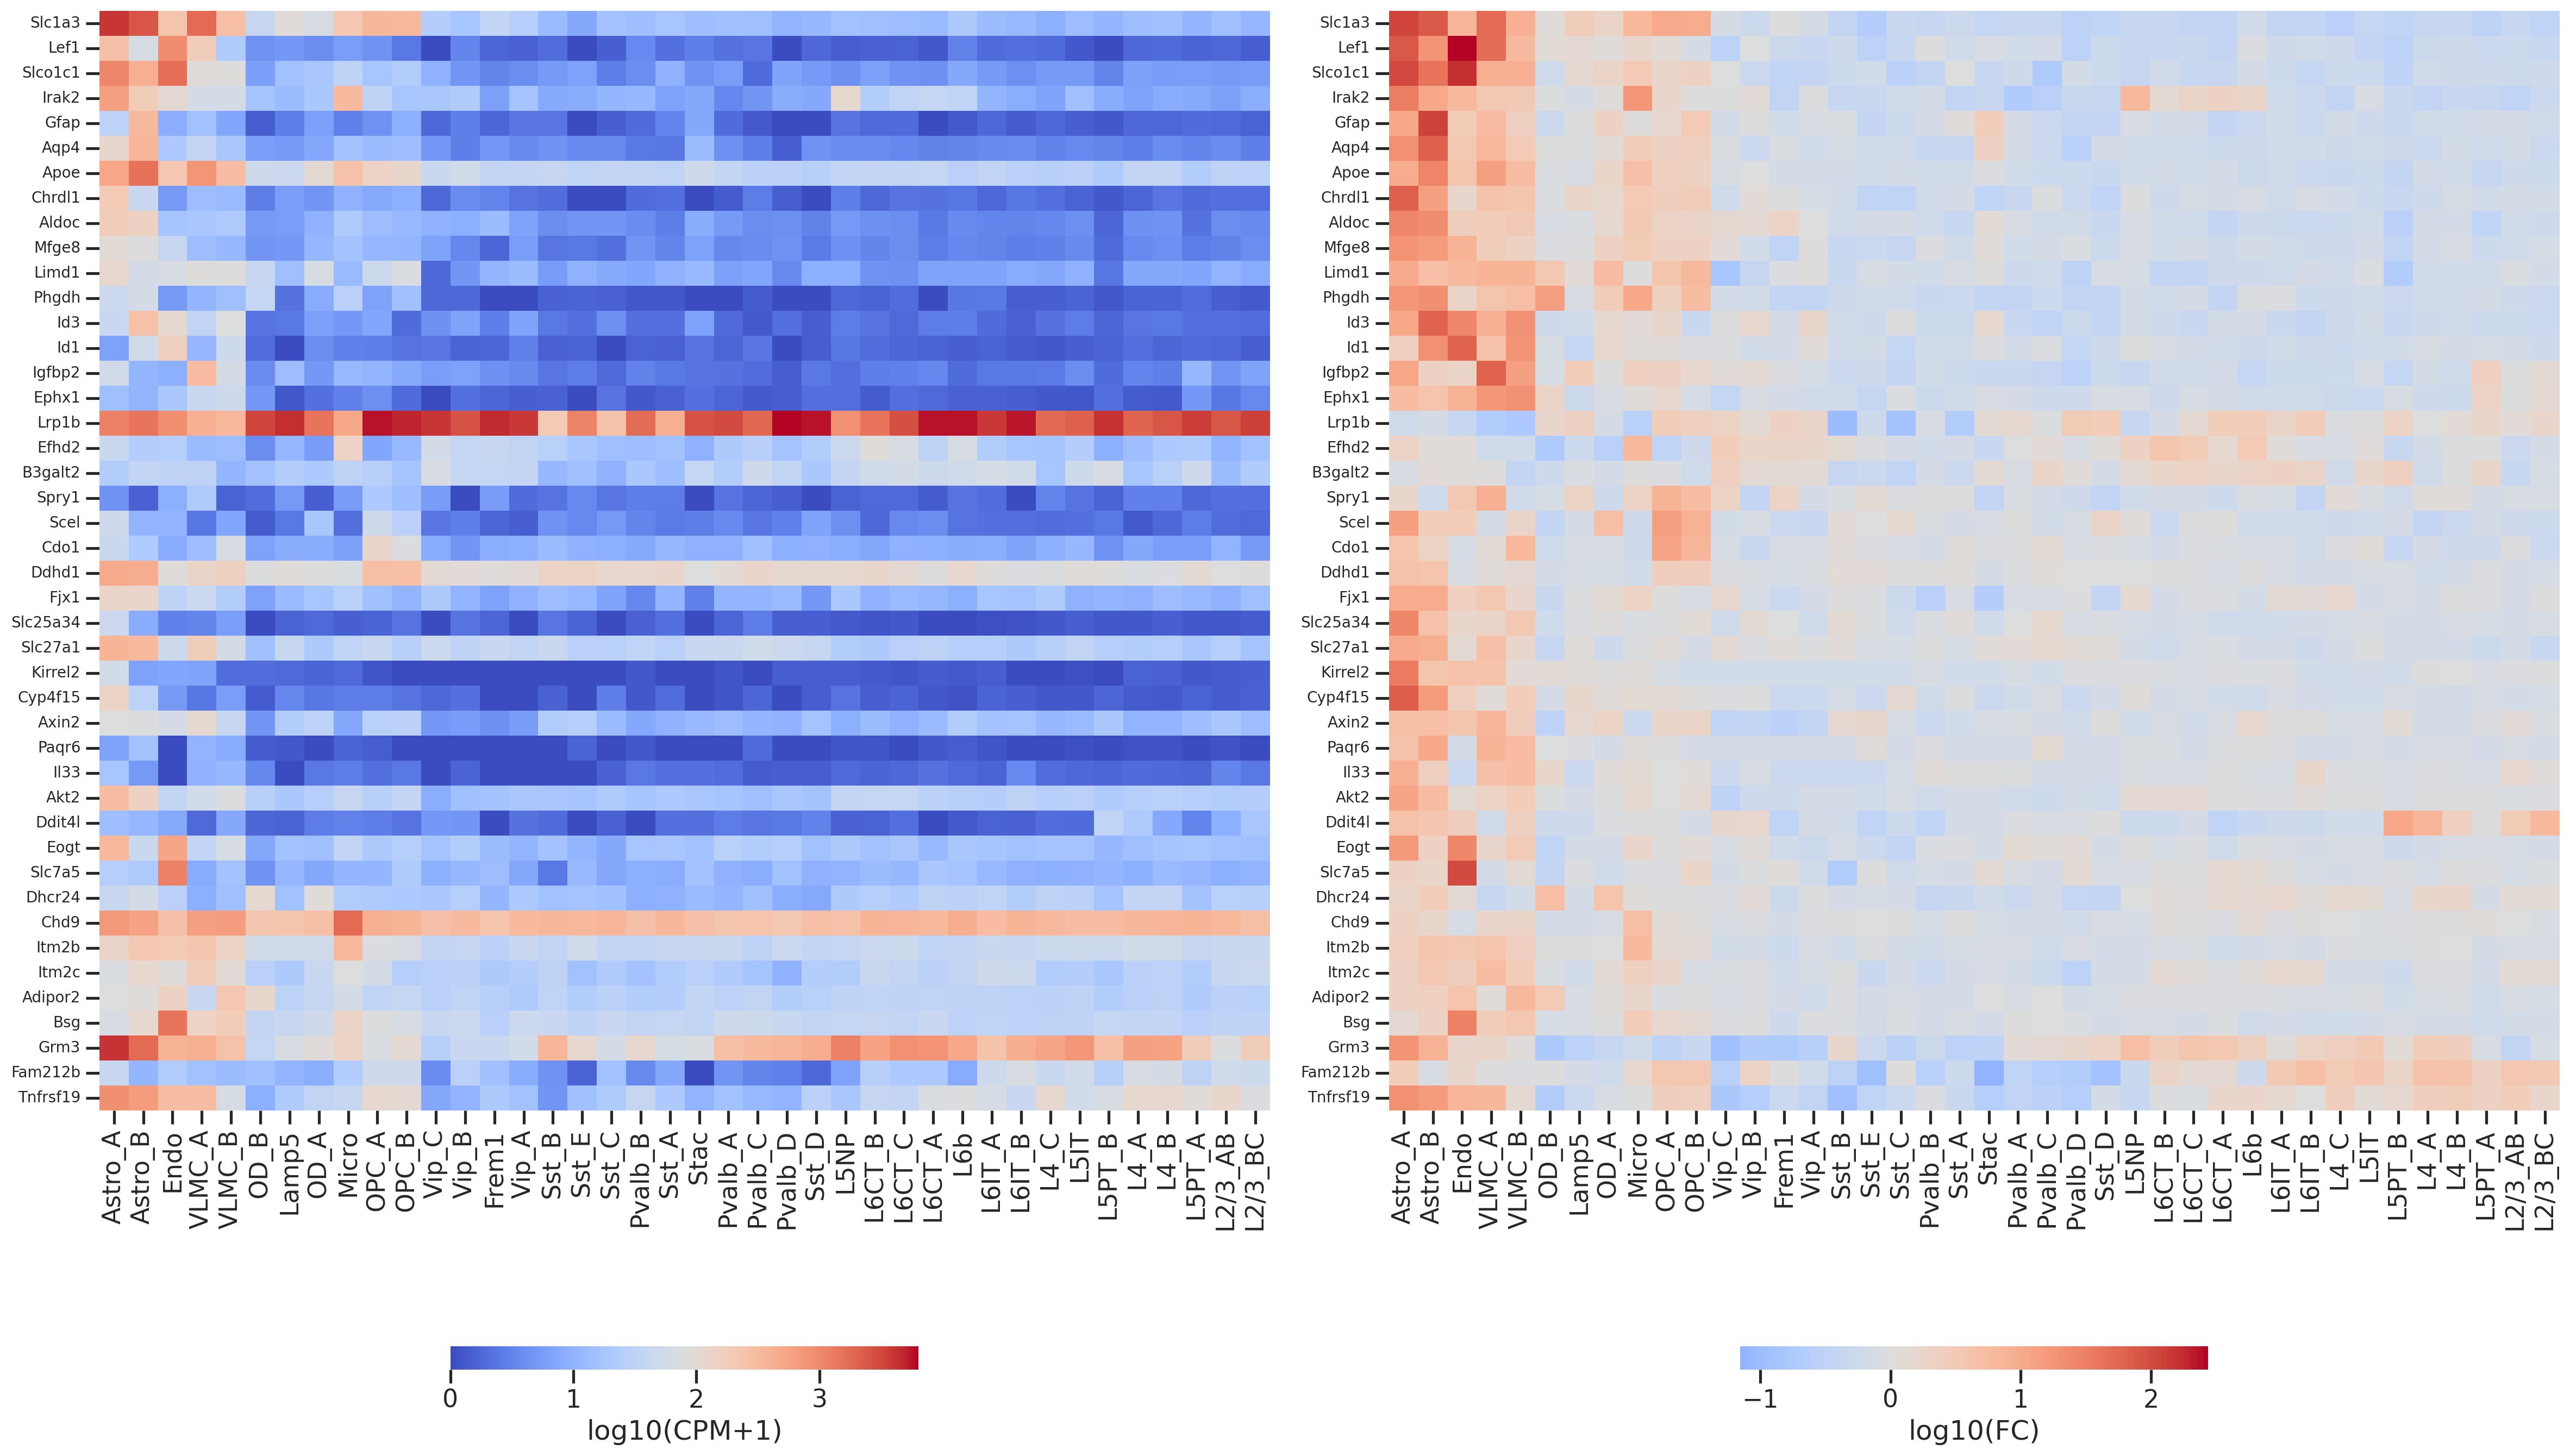

In [18]:
fig, axs = plt.subplots(1,2,figsize=(12*2,15))
ax = axs[0]
sns.heatmap(
    exp[rowidx,:][:,colidx],
    yticklabels=cnddts[rowidx],
    xticklabels=xclsts_short[colidx],
    cmap='coolwarm',
    cbar_kws=dict(shrink=0.4, label='log10(CPM+1)', location='bottom'),
    ax=ax,
    )
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)

ax = axs[1]
sns.heatmap(
    lfc[rowidx,:][:,colidx],
    yticklabels=cnddts[rowidx],
    xticklabels=xclsts_short[colidx],
    cmap='coolwarm',
    cbar_kws=dict(shrink=0.4, label='log10(FC)', location='bottom'),
    center=0,
    ax=ax,
    )
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
fig.tight_layout()
plt.show()

# check all

In [19]:
f = "../results/MERFISH_gene_panel_Current_Mar7_v5.csv"
df = pd.read_csv(f)
df = df[df['why included'].str.contains('All cell types')
        # & df['source'].str.contains('analysis')
       ]
cnddts = df['gene_name_data'].values
unq, cnts = np.unique(cnddts, return_counts=True)
print(len(cnddts), unq.shape, unq[cnts>1], [g for g in cnddts if g not in genes])

gidx = basicu.get_index_from_array(genes, cnddts)
assert np.all(gidx!=-1)

205 (205,) [] []


In [20]:
exp = np.mean(pbulks_nr[:,:,:,gidx], axis=(0,1)).T # [0,0,:,:].T #.shape
lfc = exp - np.mean(exp, axis=1).reshape(-1,1)
rowidx = basicu.order_by_hc(lfc)
colidx = basicu.order_by_hc(lfc.T)

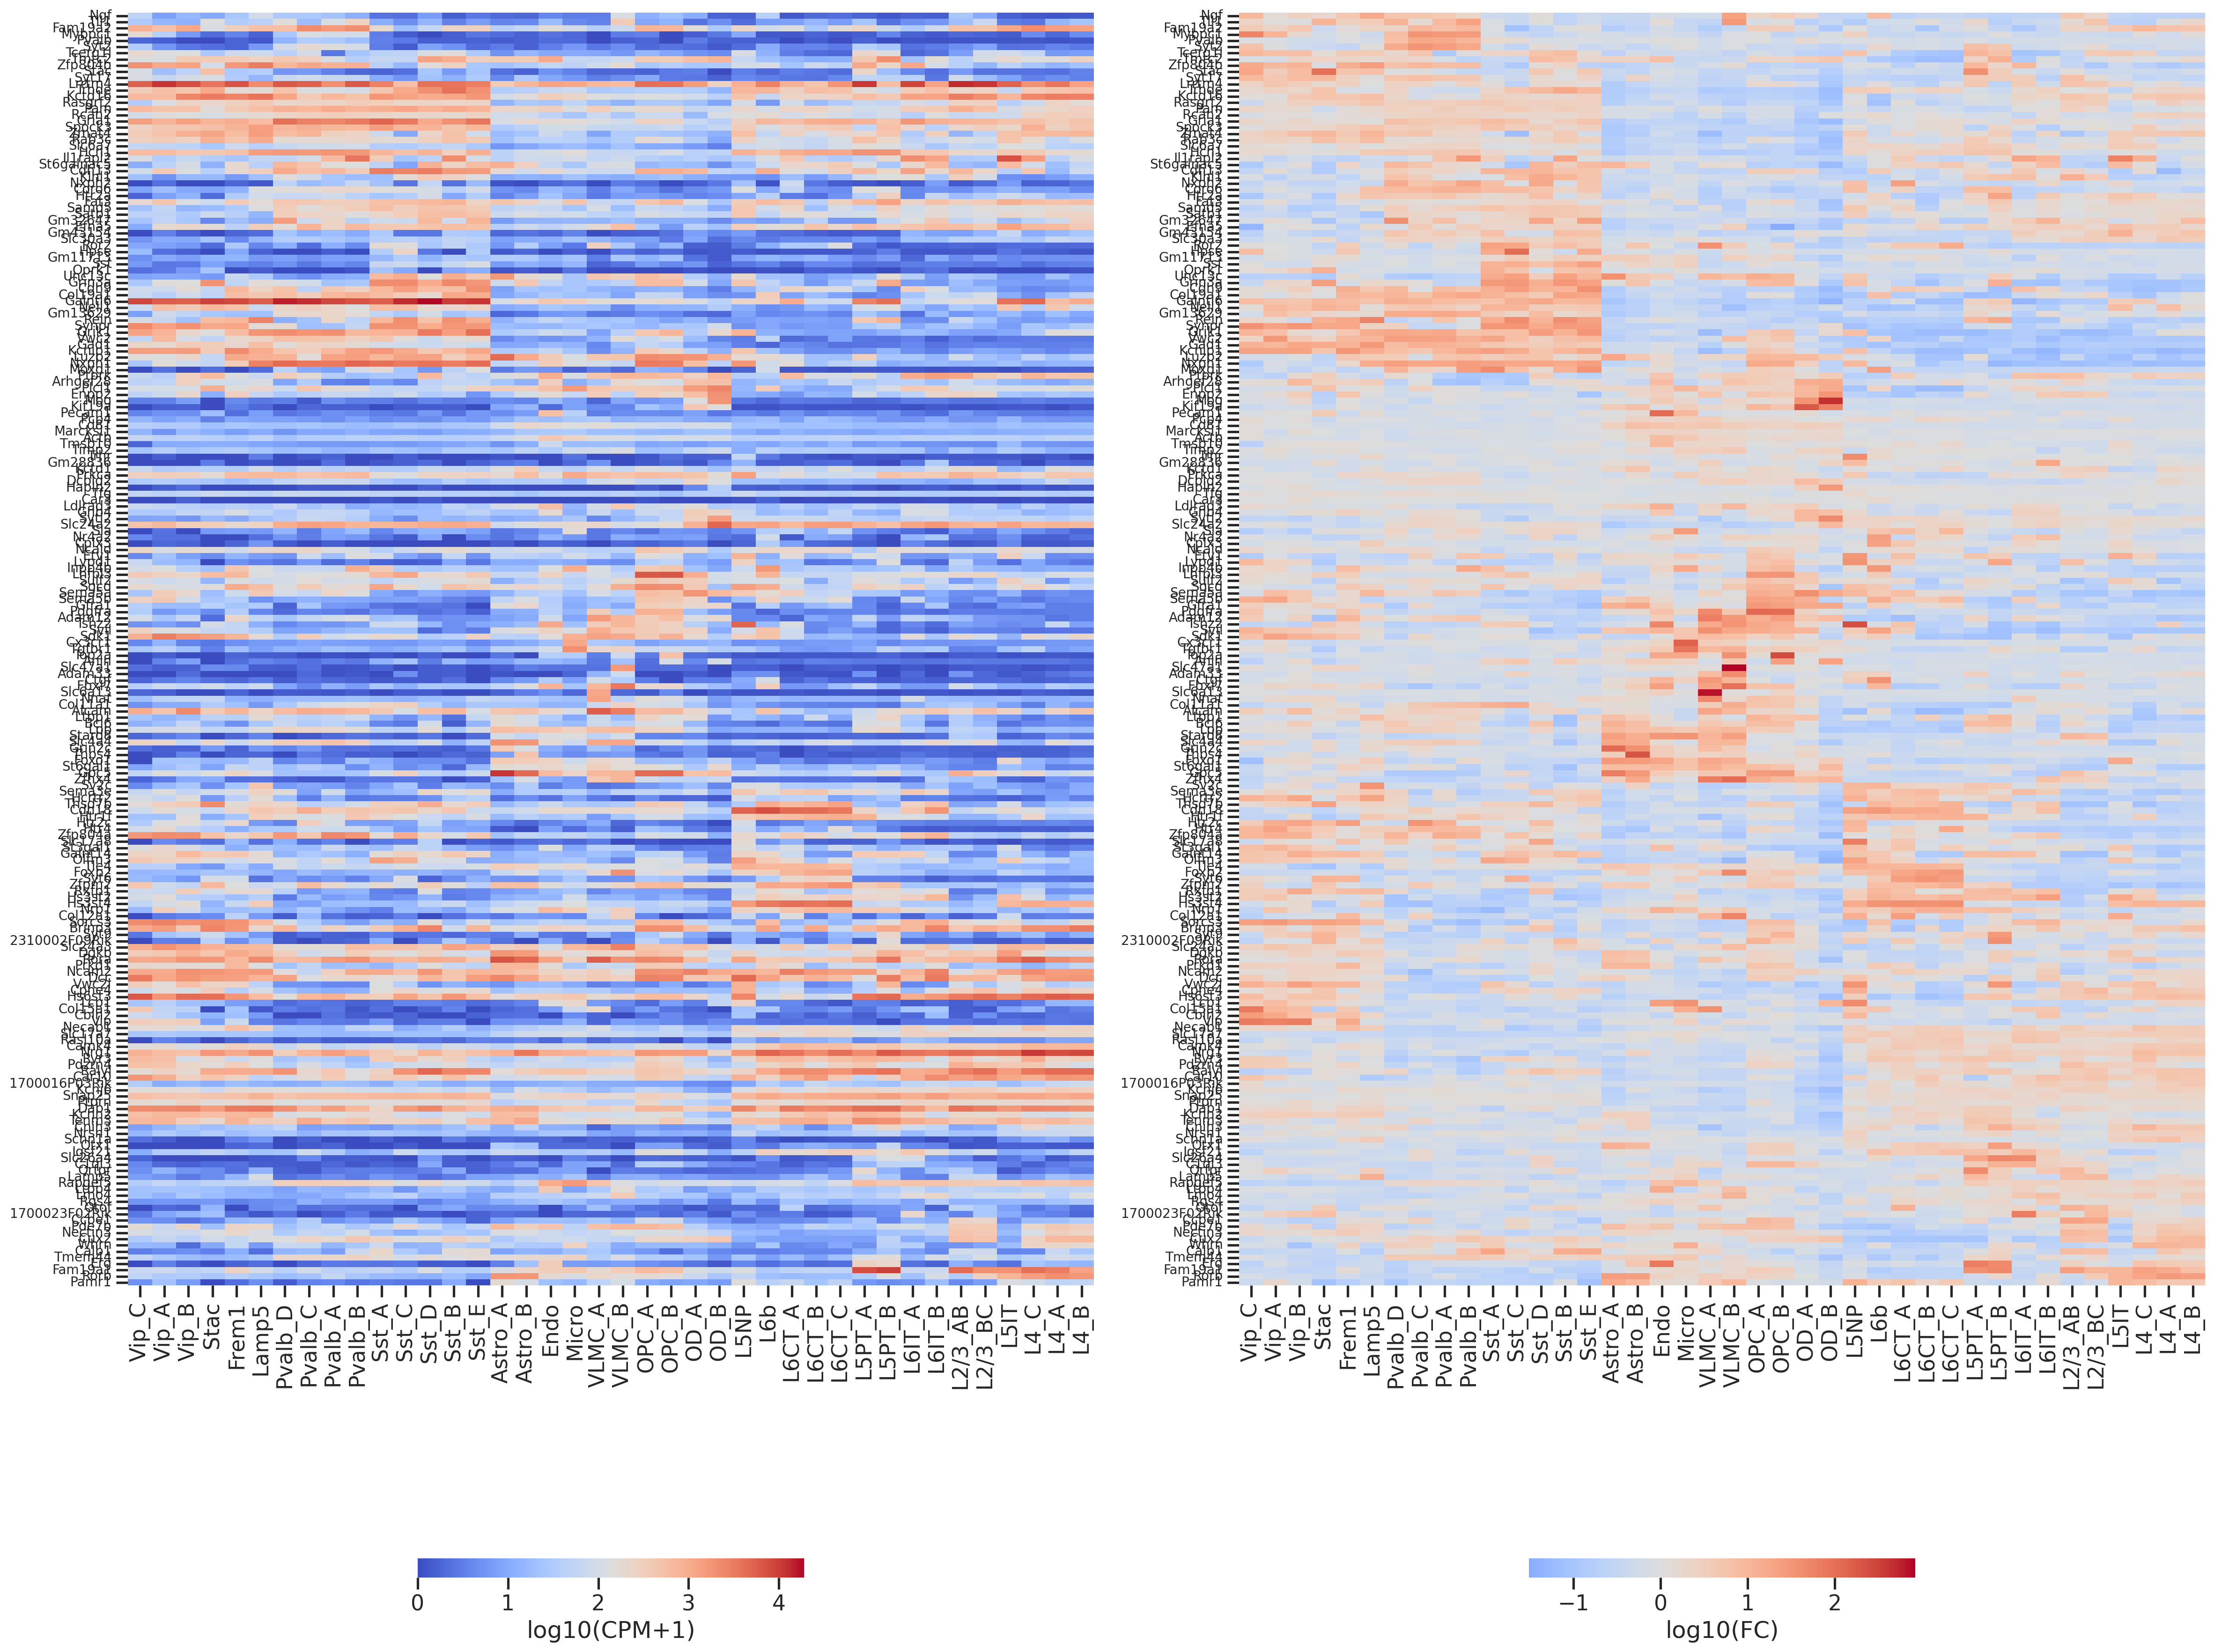

In [21]:
fig, axs = plt.subplots(1,2,figsize=(12*2,20))
ax = axs[0]
sns.heatmap(
    exp[rowidx,:][:,colidx],
    yticklabels=cnddts[rowidx],
    xticklabels=xclsts_short[colidx],
    cmap='coolwarm',
    cbar_kws=dict(shrink=0.4, label='log10(CPM+1)', location='bottom'),
    ax=ax,
    )
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)

ax = axs[1]
sns.heatmap(
    lfc[rowidx,:][:,colidx],
    yticklabels=cnddts[rowidx],
    xticklabels=xclsts_short[colidx],
    cmap='coolwarm',
    cbar_kws=dict(shrink=0.4, label='log10(FC)', location='bottom'),
    center=0,
    ax=ax,
    )
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
fig.tight_layout()
plt.show()

# check Cheng

In [22]:
f = "../results/MERFISH_gene_panel_Current_Mar7_v5.csv"
df = pd.read_csv(f)
df = df[df['why included'].str.contains('All cell types')
        & df['source'].str.contains('Cheng22')
       ]
cnddts = df['gene_name_data'].values
unq, cnts = np.unique(cnddts, return_counts=True)
print(len(cnddts), unq.shape, unq[cnts>1], [g for g in cnddts if g not in genes])

gidx = basicu.get_index_from_array(genes, cnddts)
assert np.all(gidx!=-1)

117 (117,) [] []


In [23]:
exp = np.mean(pbulks_nr[:,:,:,gidx], axis=(0,1)).T # [0,0,:,:].T #.shape
lfc = exp - np.mean(exp, axis=1).reshape(-1,1)
rowidx = basicu.order_by_hc(lfc)
colidx = basicu.order_by_hc(lfc.T)

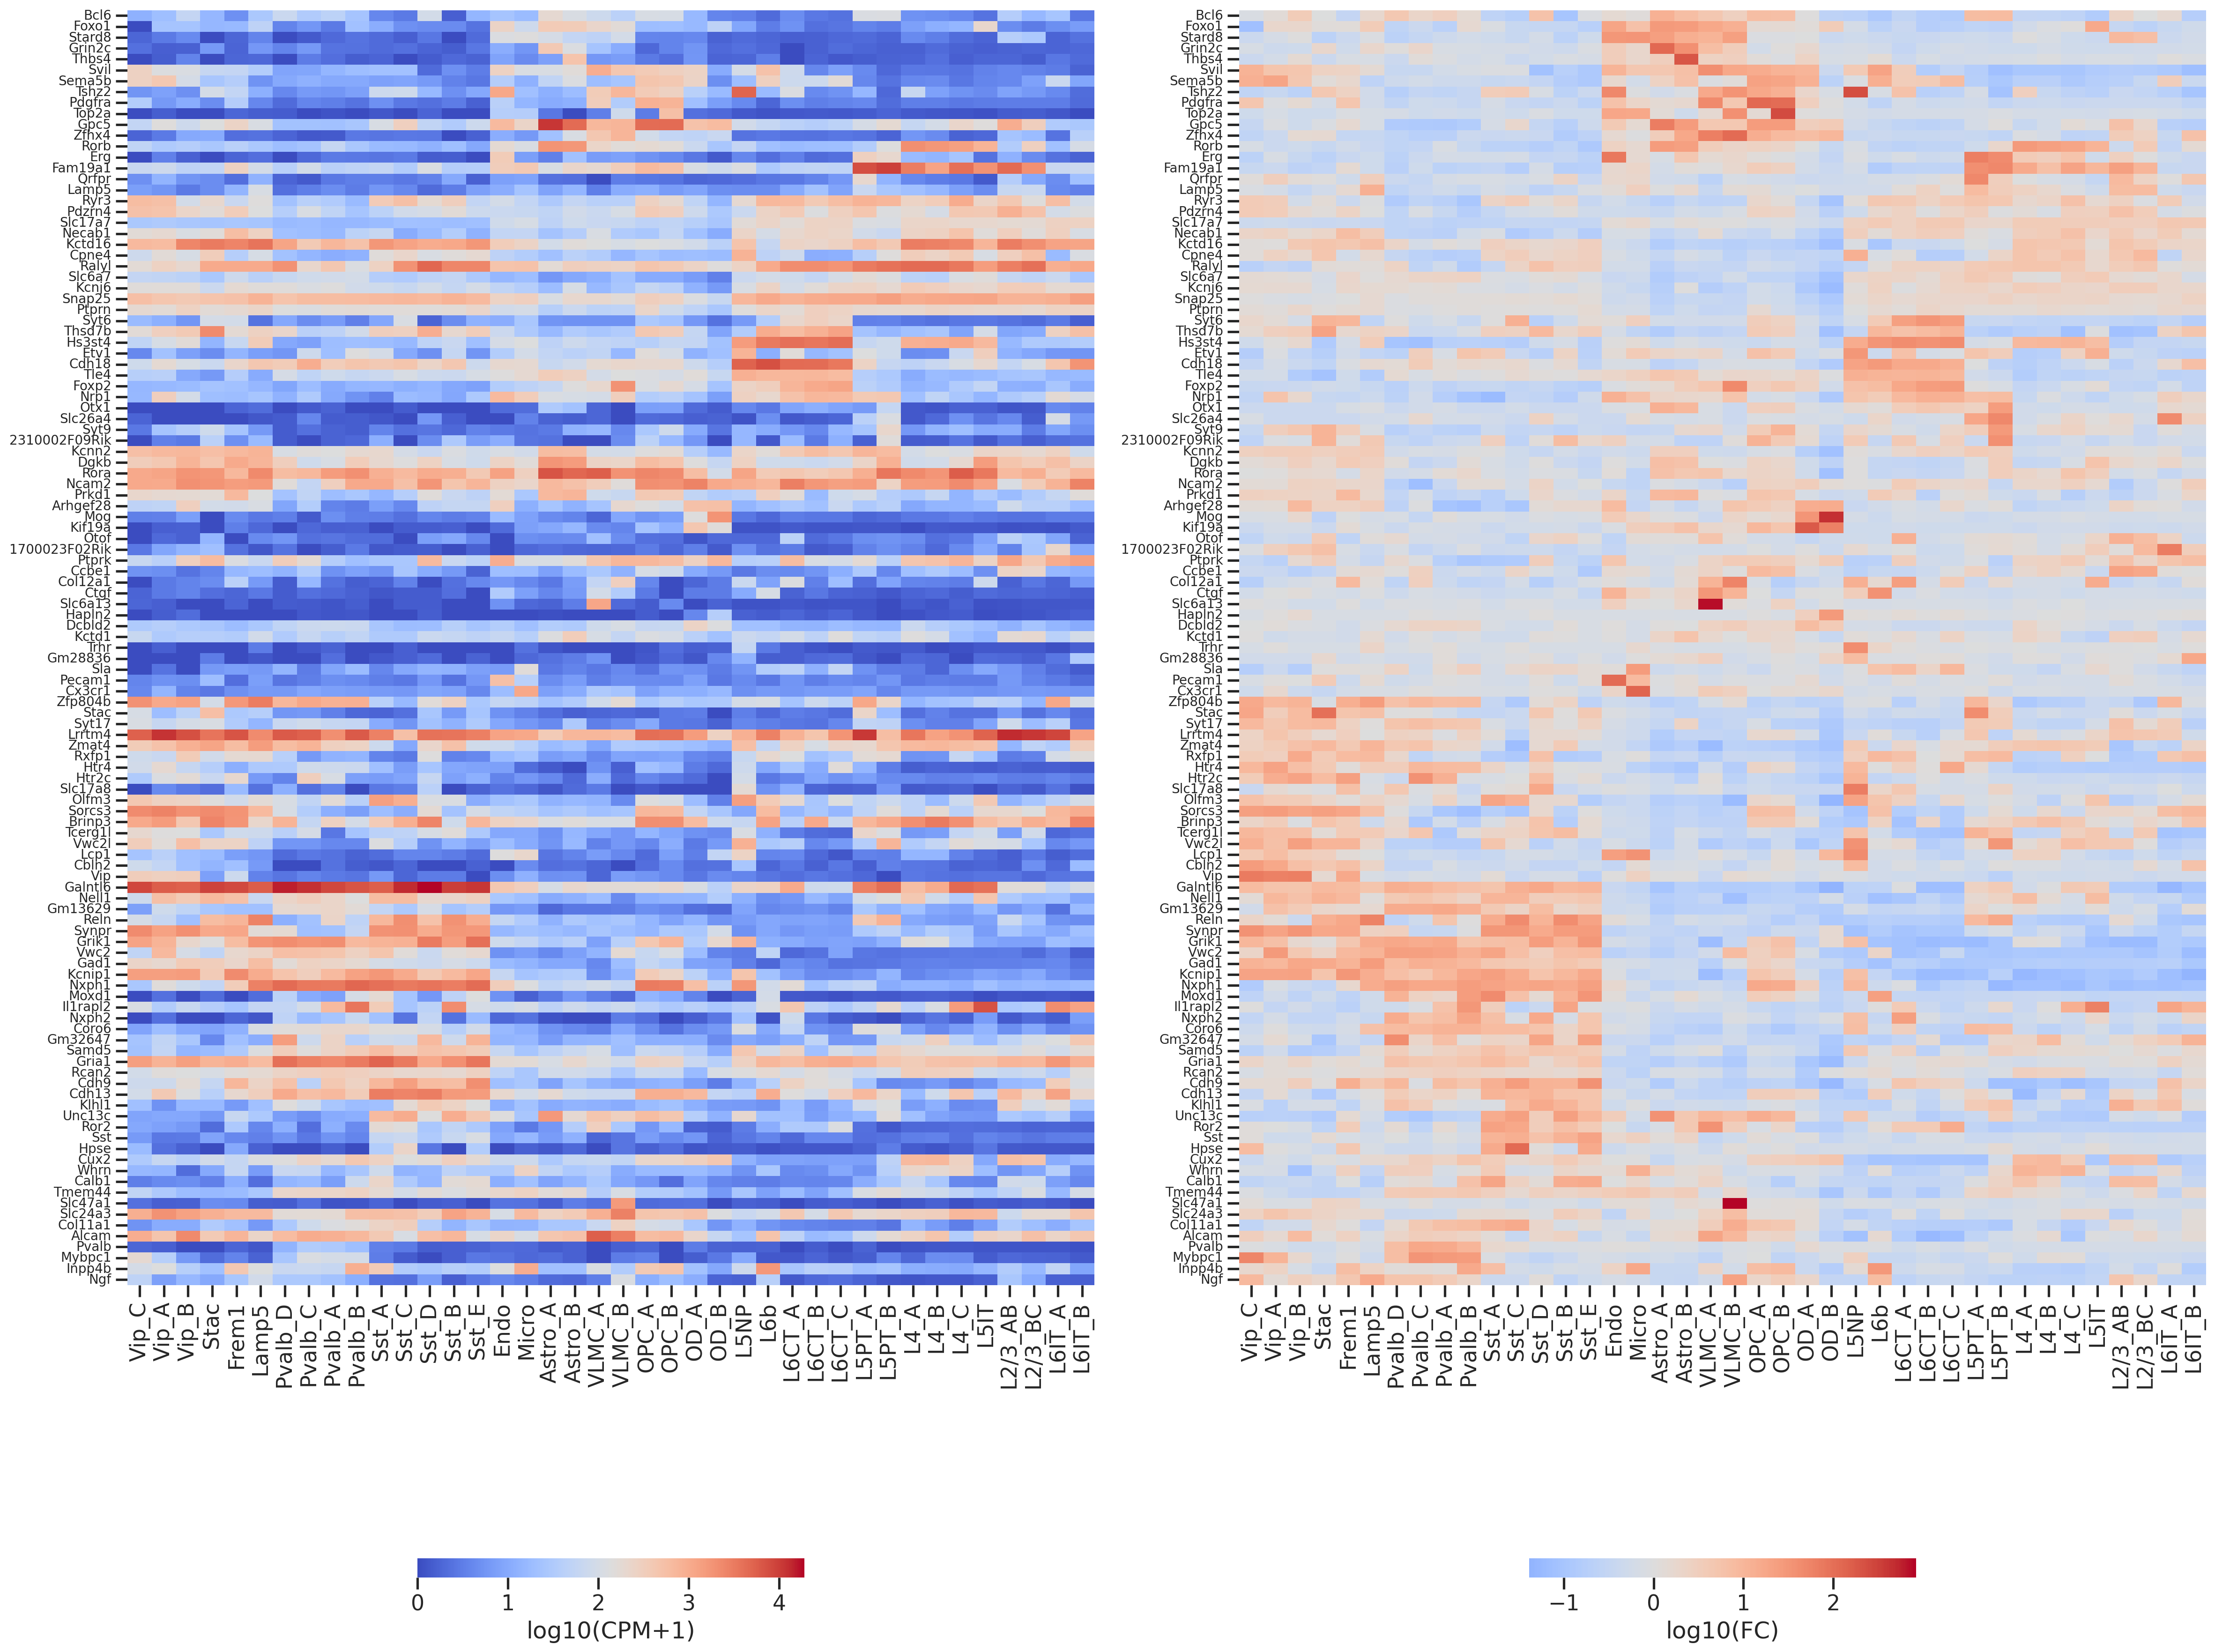

In [24]:
fig, axs = plt.subplots(1,2,figsize=(12*2,20))
ax = axs[0]
sns.heatmap(
    exp[rowidx,:][:,colidx],
    yticklabels=cnddts[rowidx],
    xticklabels=xclsts_short[colidx],
    cmap='coolwarm',
    cbar_kws=dict(shrink=0.4, label='log10(CPM+1)', location='bottom'),
    # vmax=3,
    ax=ax,
    )
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)

ax = axs[1]
sns.heatmap(
    lfc[rowidx,:][:,colidx],
    yticklabels=cnddts[rowidx],
    xticklabels=xclsts_short[colidx],
    cmap='coolwarm',
    cbar_kws=dict(shrink=0.4, label='log10(FC)', location='bottom'),
    center=0,
    ax=ax,
    )
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
fig.tight_layout()
plt.show()

# check Zador

In [25]:
f = "../results/MERFISH_gene_panel_Current_Mar7_v5.csv"
df = pd.read_csv(f)
df = df[df['why included'].str.contains('All cell types')
        & df['source'].str.contains('Zador')
       ]
cnddts = df['gene_name_data'].values
unq, cnts = np.unique(cnddts, return_counts=True)
print(len(cnddts), unq.shape, unq[cnts>1], [g for g in cnddts if g not in genes])

gidx = basicu.get_index_from_array(genes, cnddts)
assert np.all(gidx!=-1)

107 (107,) [] []


In [26]:
exp = np.mean(pbulks_nr[:,:,:,gidx], axis=(0,1)).T # [0,0,:,:].T #.shape
lfc = exp - np.mean(exp, axis=1).reshape(-1,1)
rowidx = basicu.order_by_hc(lfc)
colidx = basicu.order_by_hc(lfc.T)

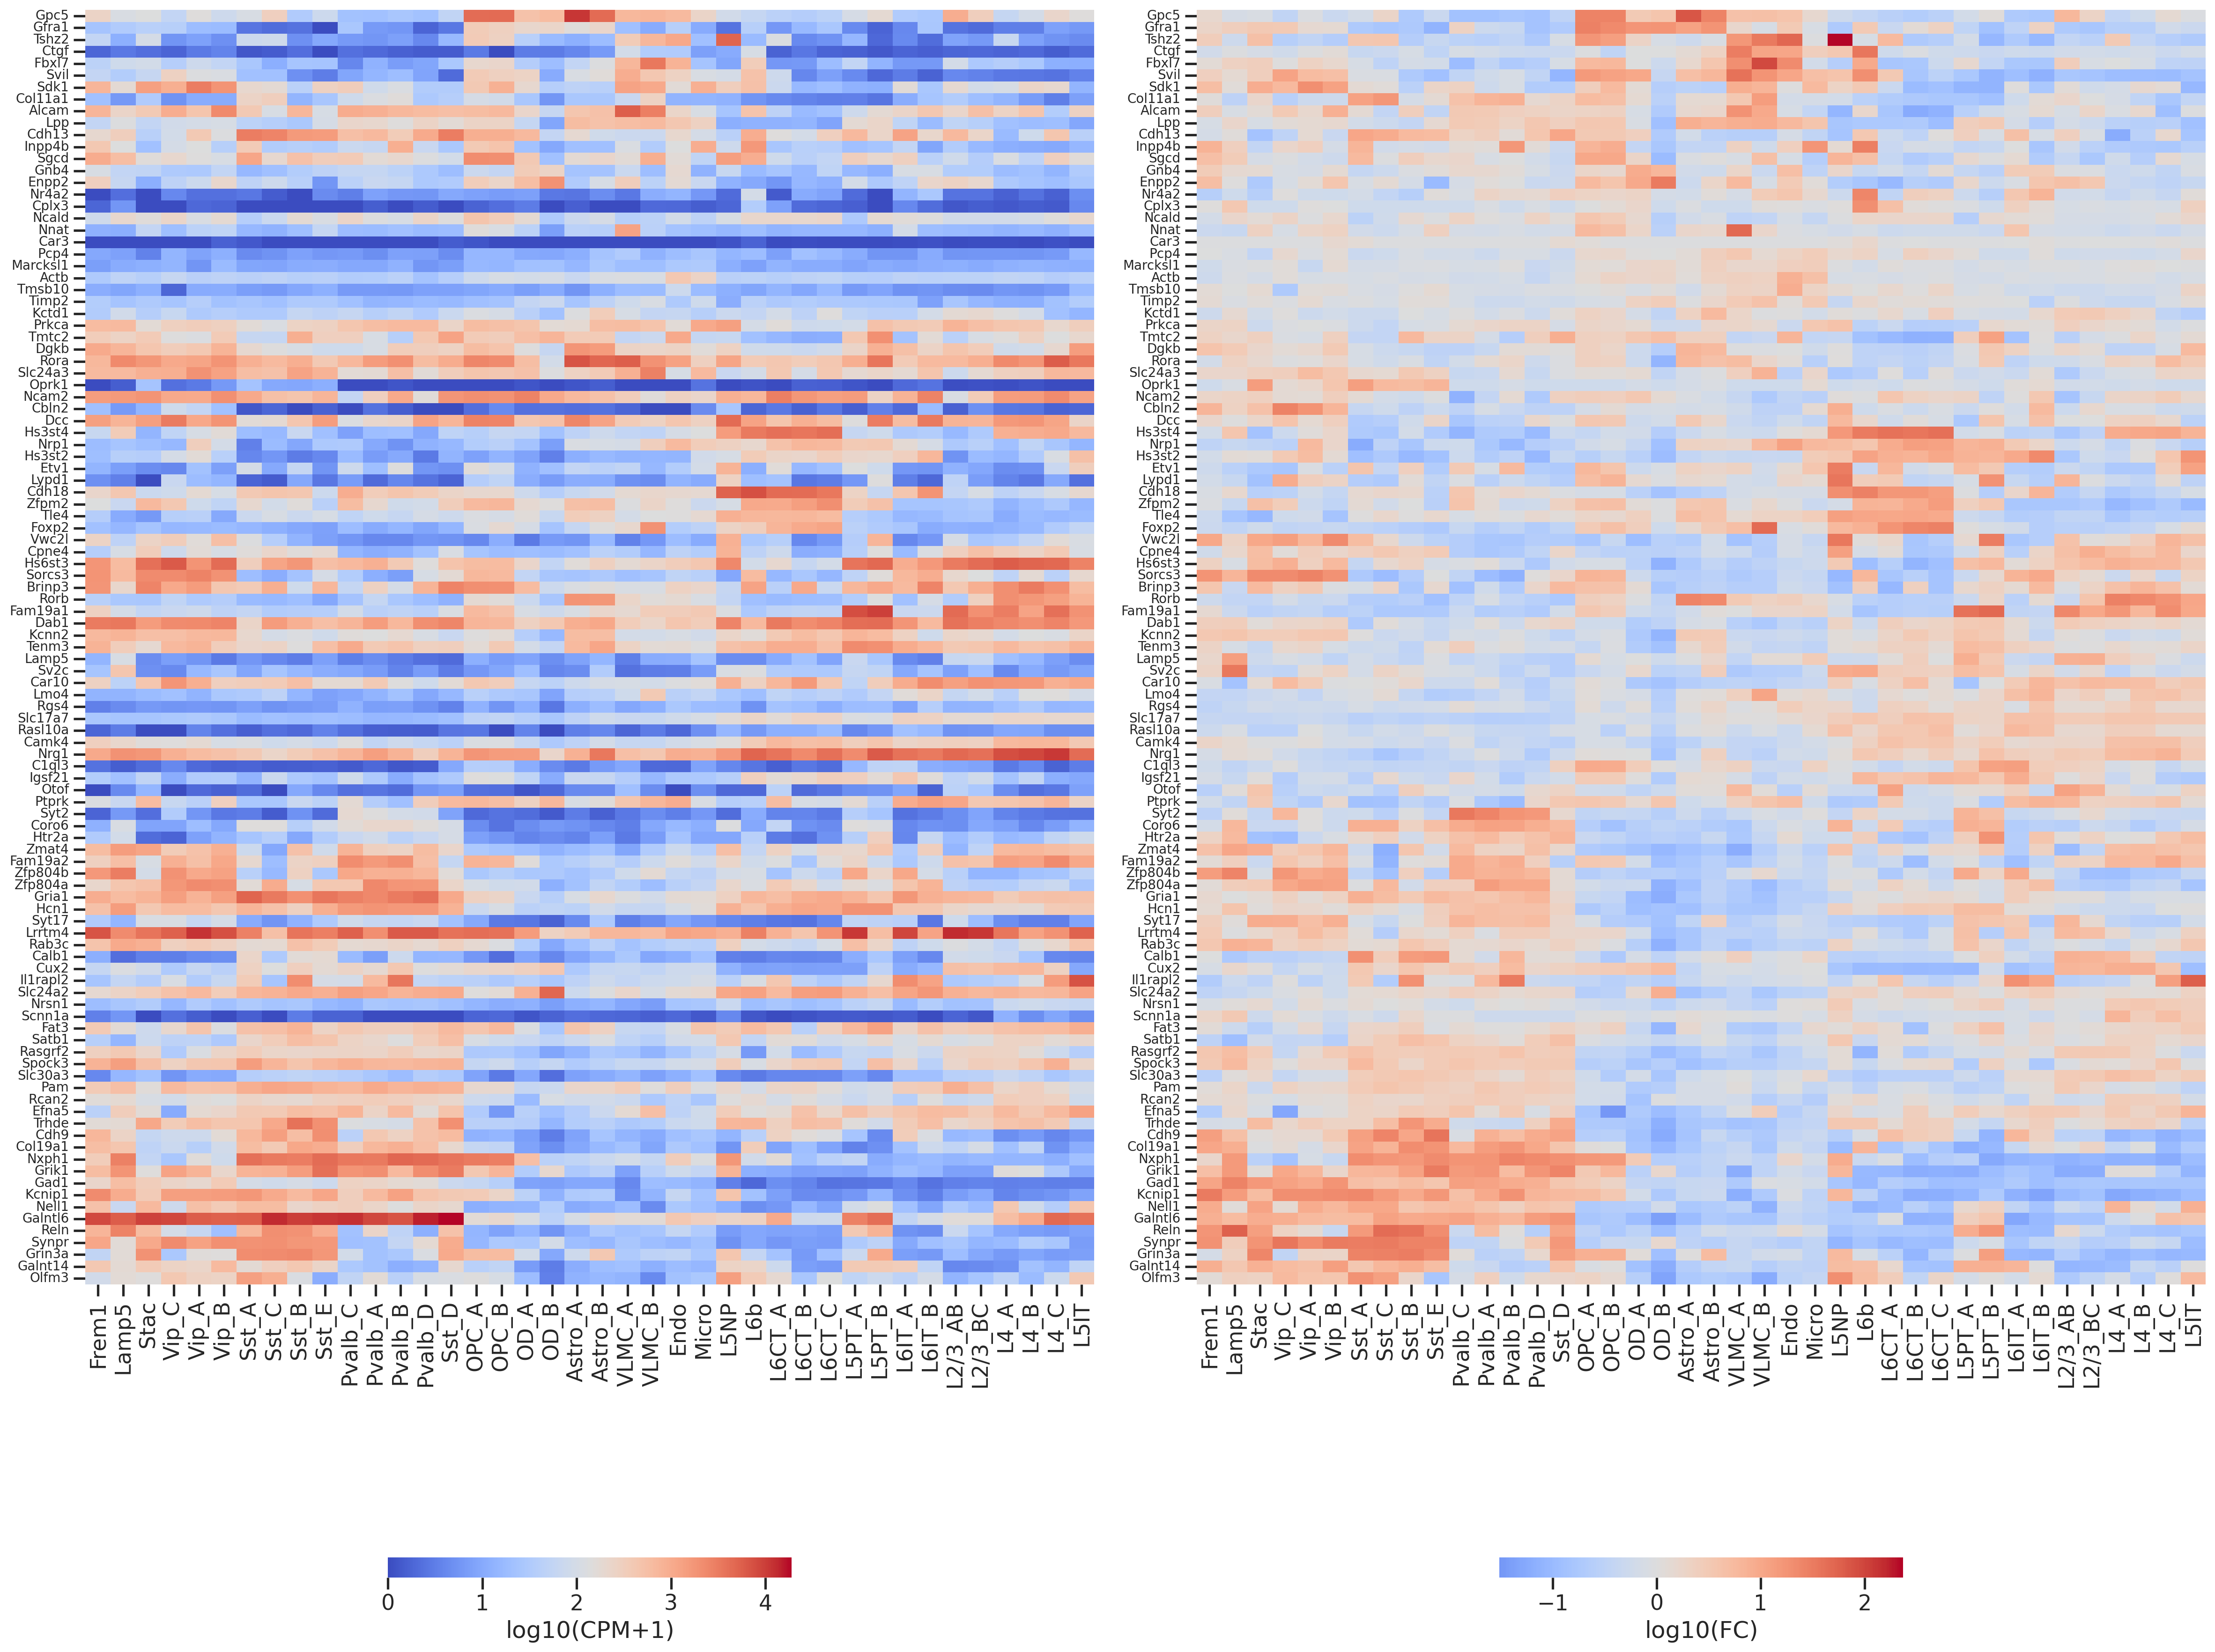

In [27]:
fig, axs = plt.subplots(1,2,figsize=(12*2,20))
ax = axs[0]
sns.heatmap(
    exp[rowidx,:][:,colidx],
    yticklabels=cnddts[rowidx],
    xticklabels=xclsts_short[colidx],
    cmap='coolwarm',
    cbar_kws=dict(shrink=0.4, label='log10(CPM+1)', location='bottom'),
    # vmax=3,
    ax=ax,
    )
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)

ax = axs[1]
sns.heatmap(
    lfc[rowidx,:][:,colidx],
    yticklabels=cnddts[rowidx],
    xticklabels=xclsts_short[colidx],
    cmap='coolwarm',
    cbar_kws=dict(shrink=0.4, label='log10(FC)', location='bottom'),
    center=0,
    ax=ax,
    )
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
fig.tight_layout()
plt.show()

# check PROPOSE

In [28]:
f = "../results/MERFISH_gene_panel_Current_Mar7_v5.csv"
df = pd.read_csv(f)
df = df[df['why included'].str.contains('All cell types')
        & df['source'].str.contains('our analysis')
       ]
cnddts = df['gene_name_data'].values
unq, cnts = np.unique(cnddts, return_counts=True)
print(len(cnddts), unq.shape, unq[cnts>1], [g for g in cnddts if g not in genes])

gidx = basicu.get_index_from_array(genes, cnddts)
assert np.all(gidx!=-1)

70 (70,) [] []


In [29]:
exp = np.mean(pbulks_nr[:,:,:,gidx], axis=(0,1)).T # [0,0,:,:].T #.shape
lfc = exp - np.mean(exp, axis=1).reshape(-1,1)
rowidx = basicu.order_by_hc(lfc)
colidx = basicu.order_by_hc(lfc.T)

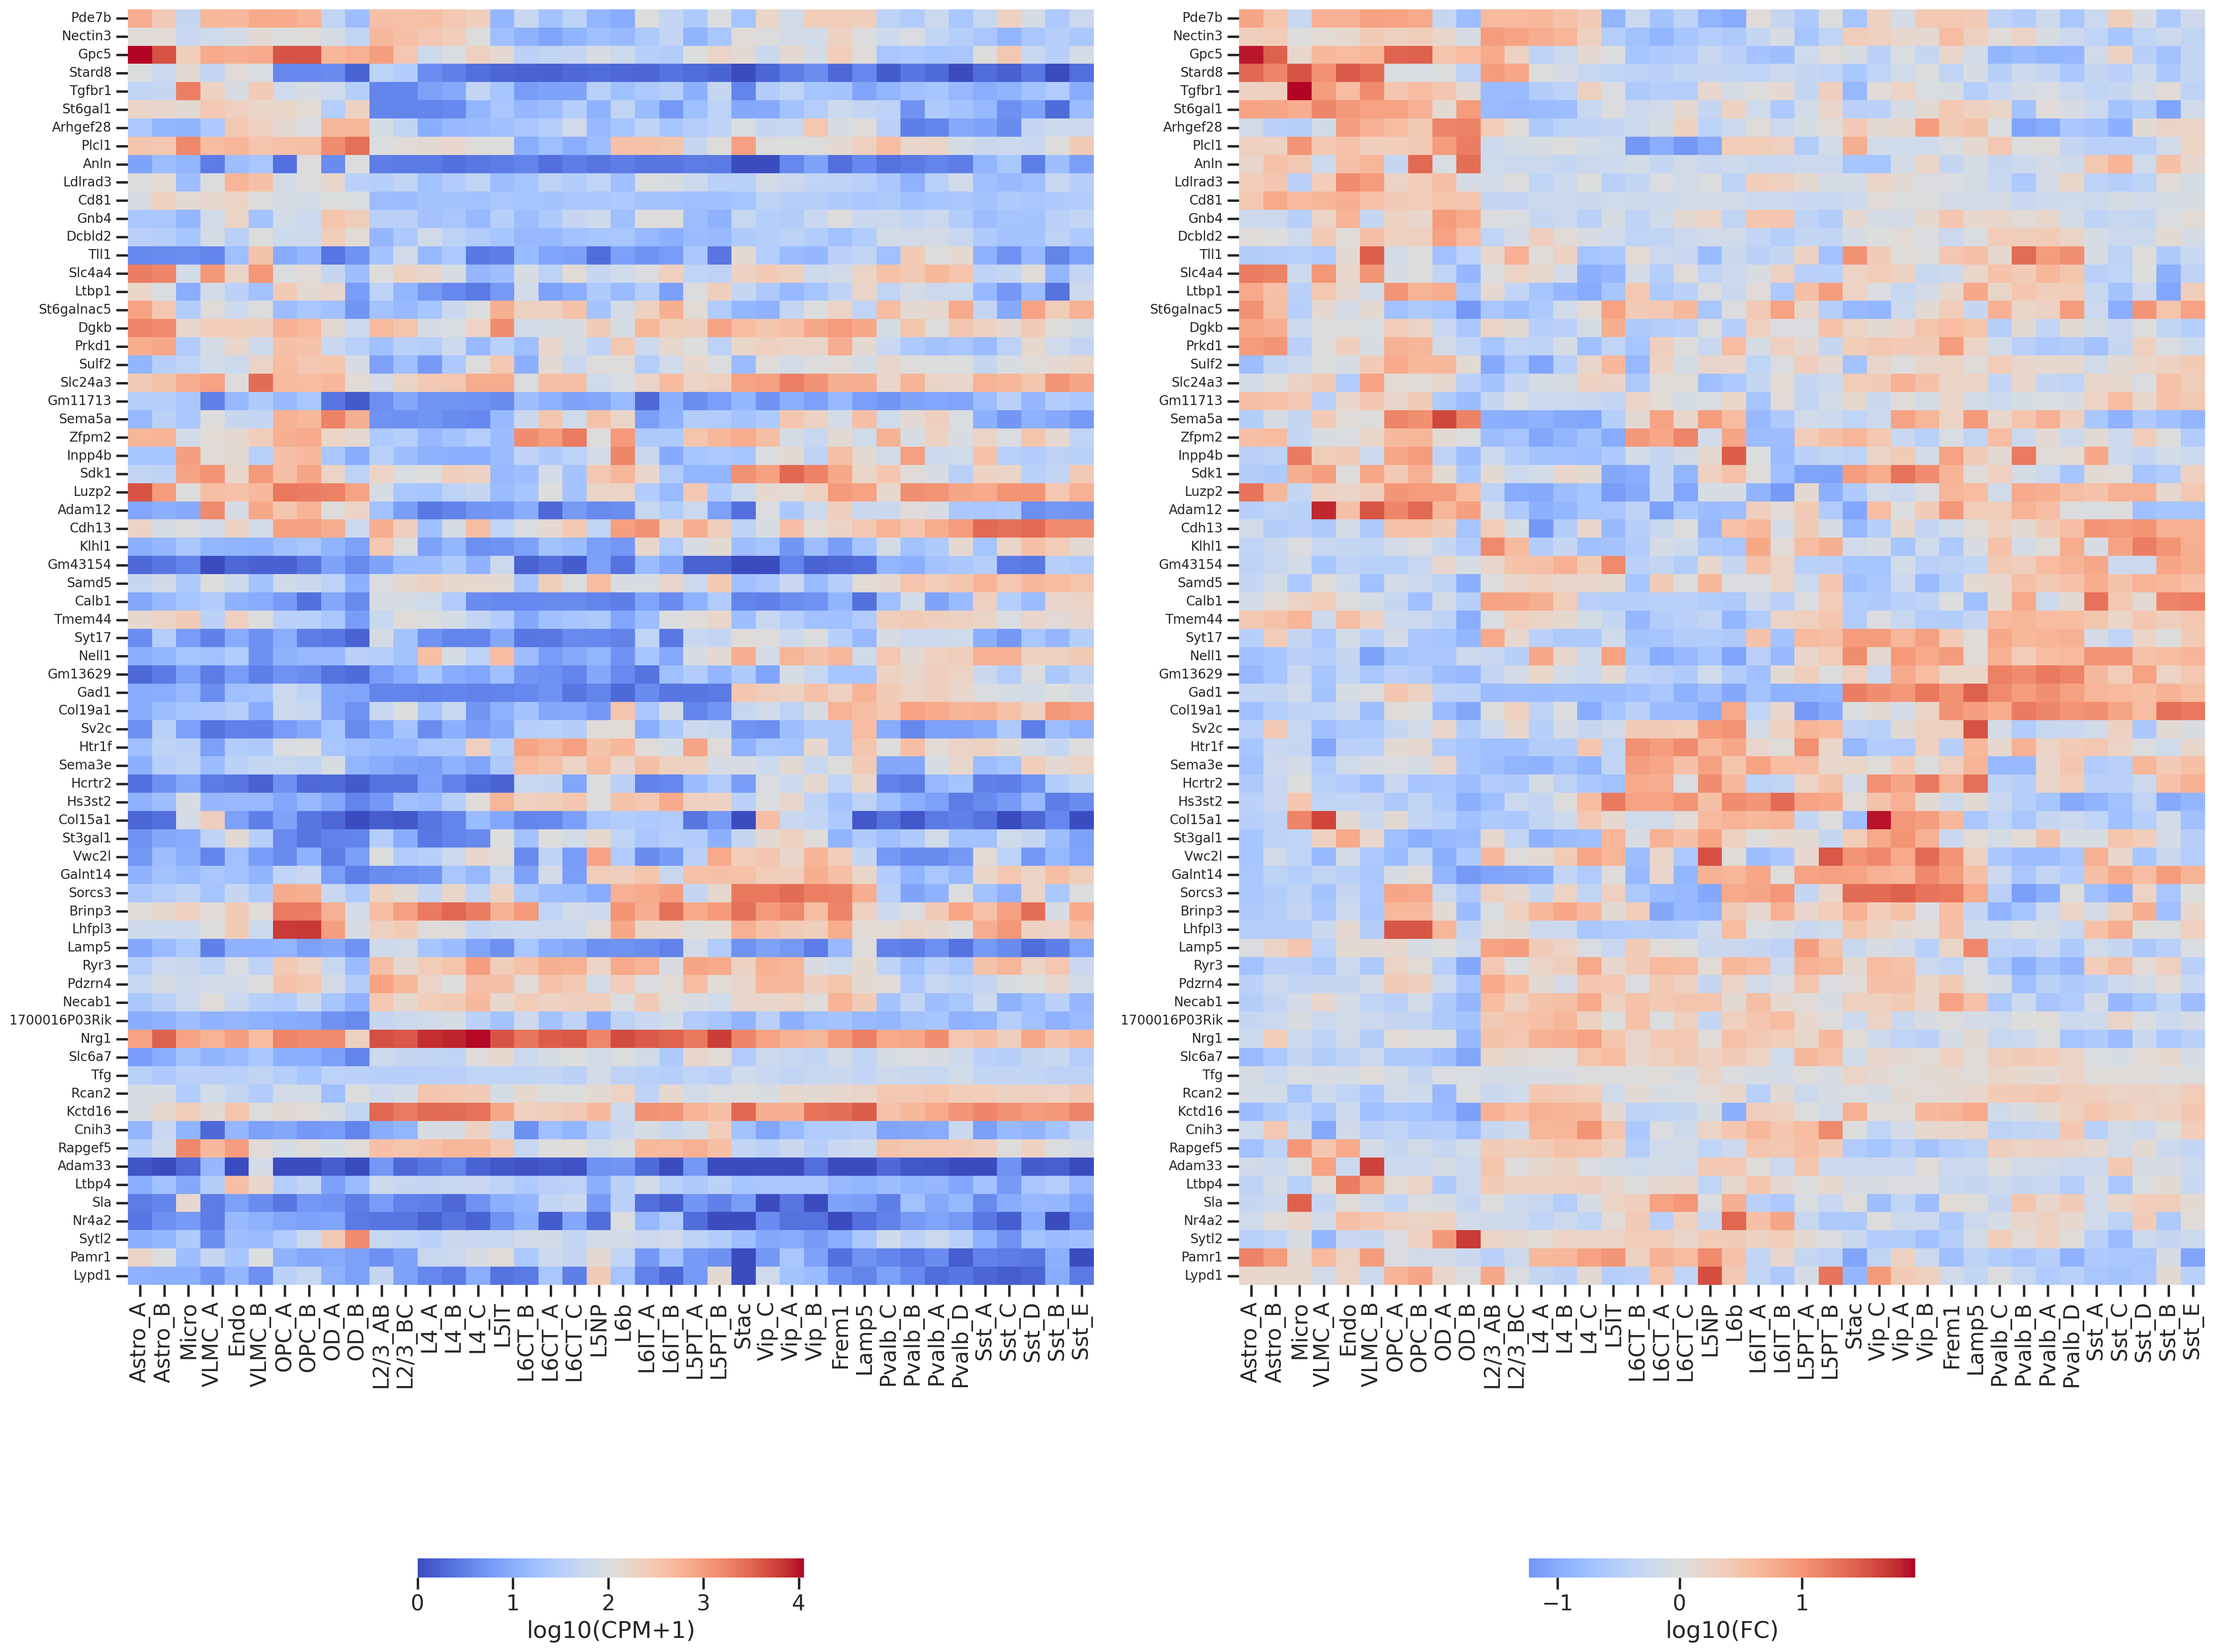

In [30]:
fig, axs = plt.subplots(1,2,figsize=(12*2,20))
ax = axs[0]
sns.heatmap(
    exp[rowidx,:][:,colidx],
    yticklabels=cnddts[rowidx],
    xticklabels=xclsts_short[colidx],
    cmap='coolwarm',
    cbar_kws=dict(shrink=0.4, label='log10(CPM+1)', location='bottom'),
    # vmax=3,
    ax=ax,
    )
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)

ax = axs[1]
sns.heatmap(
    lfc[rowidx,:][:,colidx],
    yticklabels=cnddts[rowidx],
    xticklabels=xclsts_short[colidx],
    cmap='coolwarm',
    cbar_kws=dict(shrink=0.4, label='log10(FC)', location='bottom'),
    center=0,
    ax=ax,
    )
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
fig.tight_layout()
plt.show()

# check Cheng and Zador

In [31]:
f = "../results/MERFISH_gene_panel_Current_Mar7_v5.csv"
df = pd.read_csv(f)
df = df[df['why included'].str.contains('All cell types')
        & (df['source'].str.contains('Cheng22') | df['source'].str.contains('Zador'))
       ]
cnddts = df['gene_name_data'].values
unq, cnts = np.unique(cnddts, return_counts=True)
print(len(cnddts), unq.shape, unq[cnts>1], [g for g in cnddts if g not in genes])

gidx = basicu.get_index_from_array(genes, cnddts)
assert np.all(gidx!=-1)

173 (173,) [] []


In [32]:
exp = np.mean(pbulks_nr[:,:,:,gidx], axis=(0,1)).T # [0,0,:,:].T #.shape
lfc = exp - np.mean(exp, axis=1).reshape(-1,1)
rowidx = basicu.order_by_hc(lfc)
colidx = basicu.order_by_hc(lfc.T)

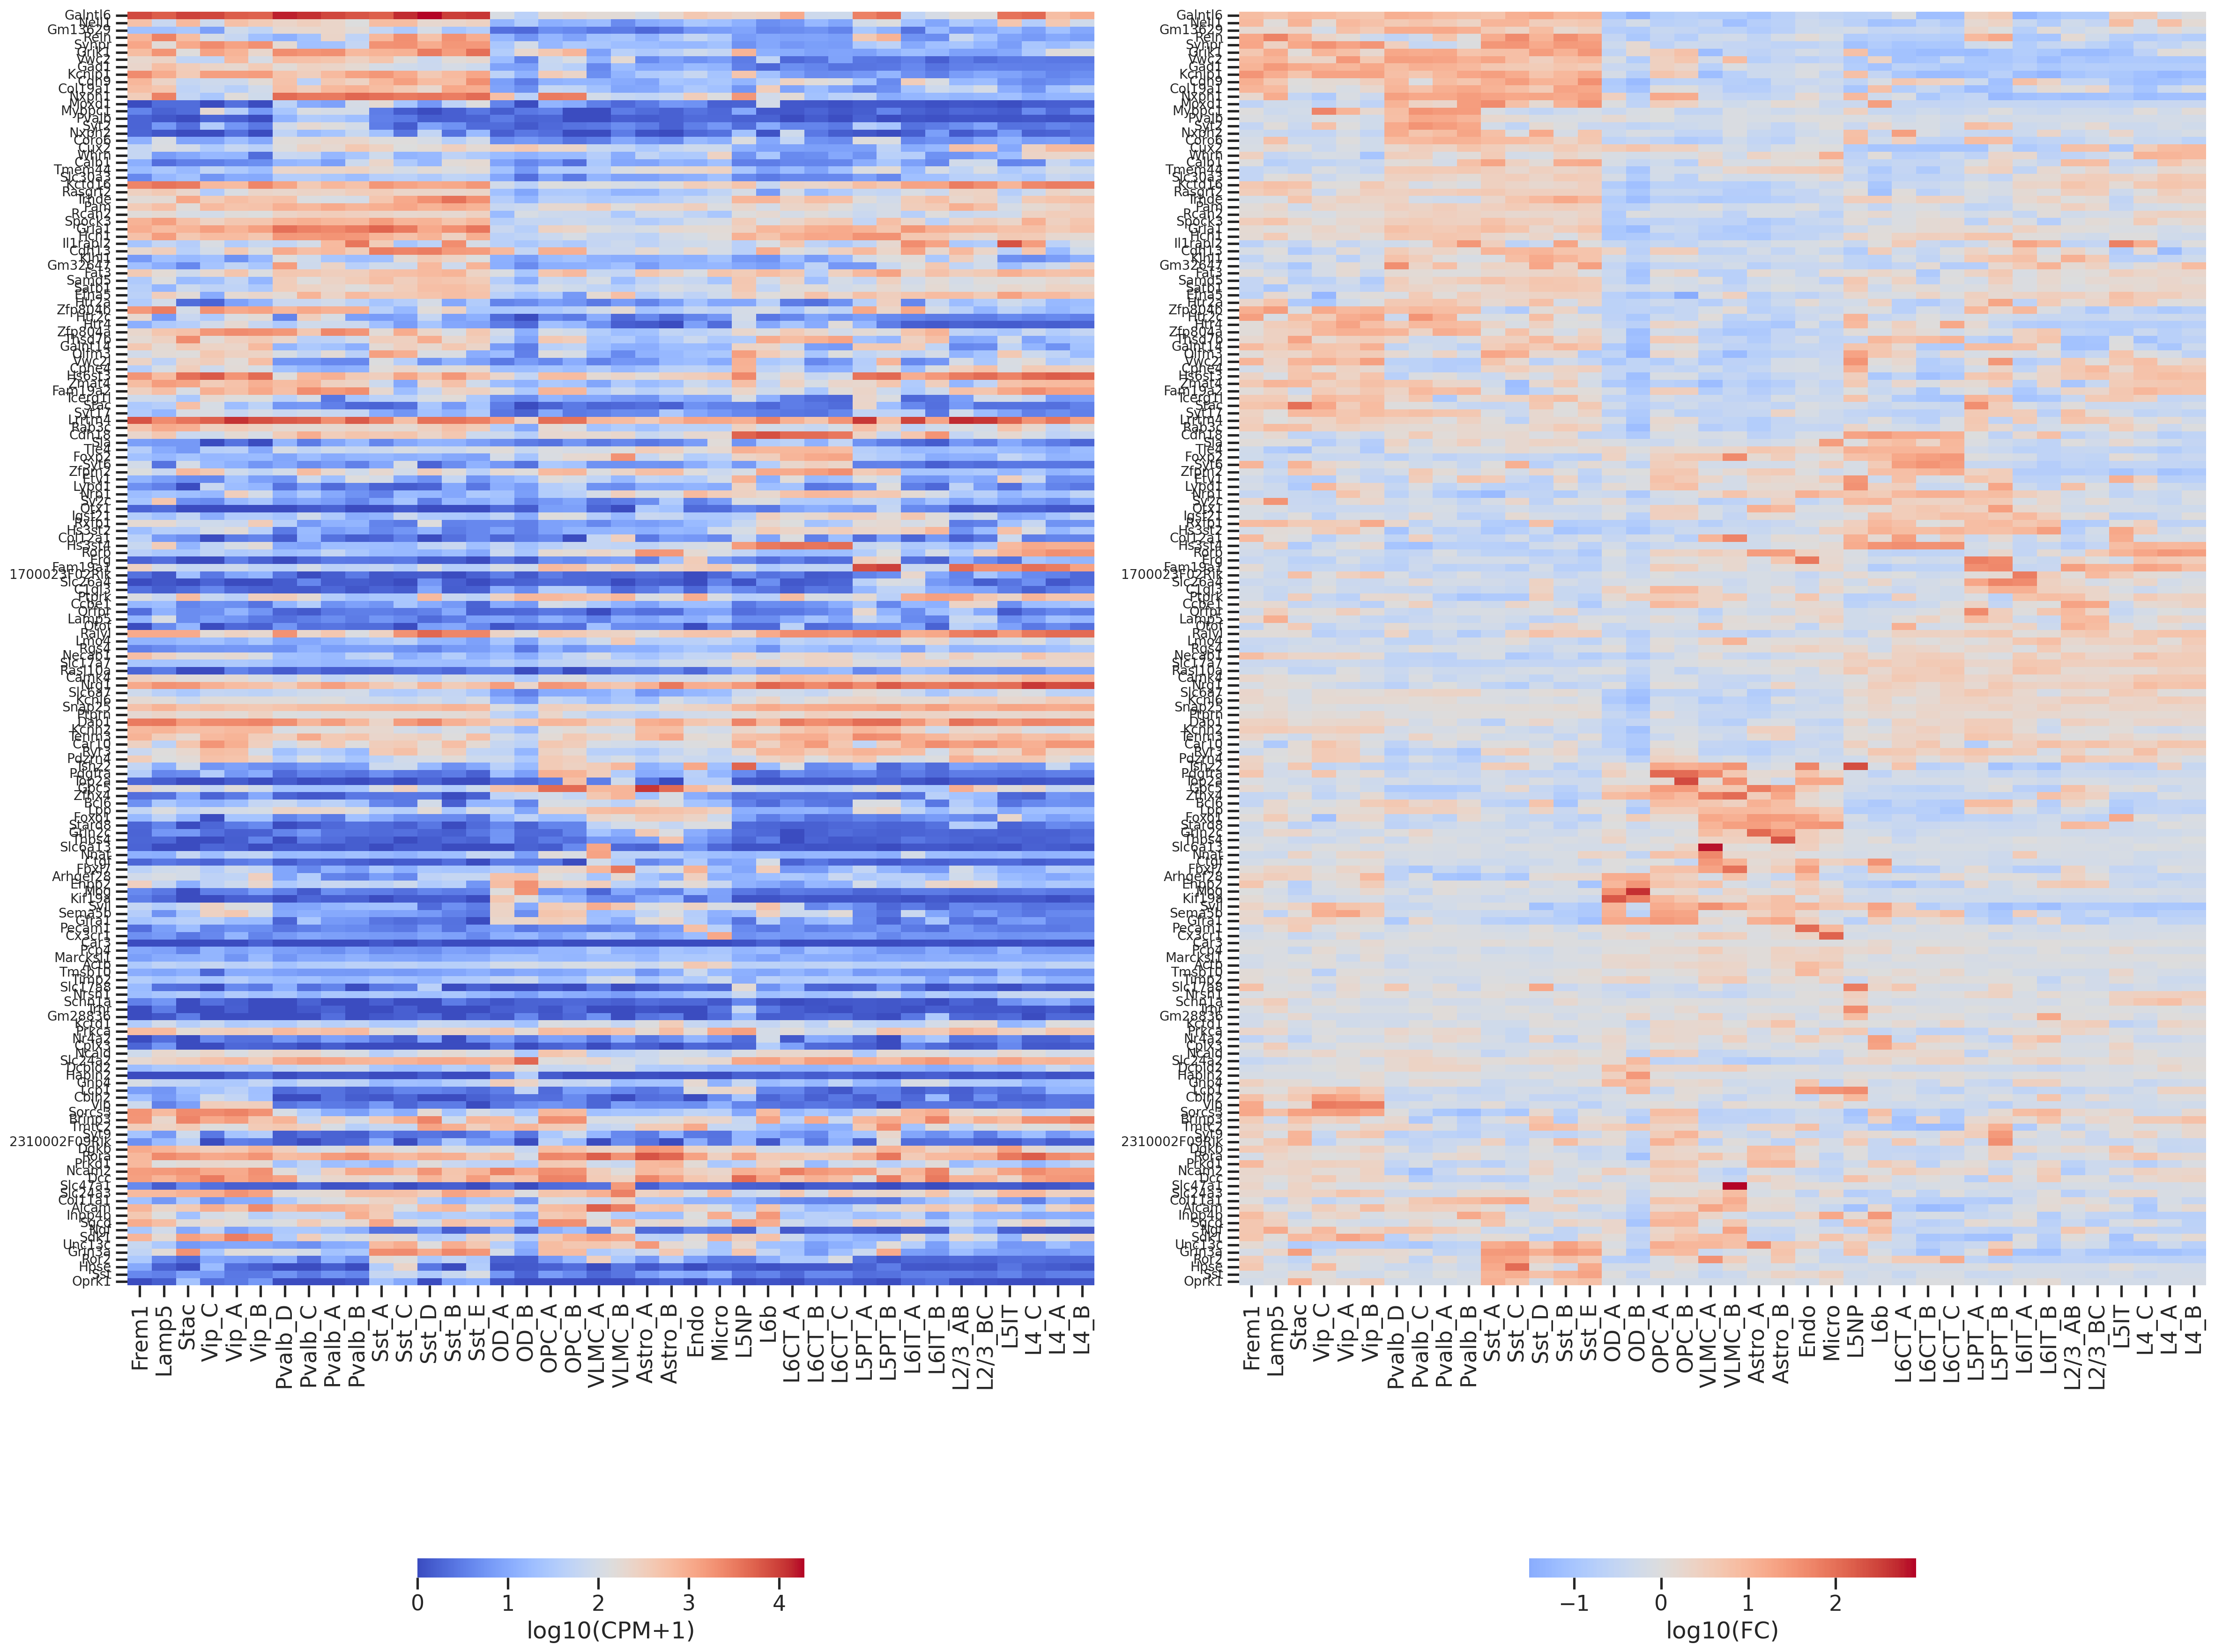

In [33]:
fig, axs = plt.subplots(1,2,figsize=(12*2,20))
ax = axs[0]
sns.heatmap(
    exp[rowidx,:][:,colidx],
    yticklabels=cnddts[rowidx],
    xticklabels=xclsts_short[colidx],
    cmap='coolwarm',
    cbar_kws=dict(shrink=0.4, label='log10(CPM+1)', location='bottom'),
    # vmax=3,
    ax=ax,
    )
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)

ax = axs[1]
sns.heatmap(
    lfc[rowidx,:][:,colidx],
    yticklabels=cnddts[rowidx],
    xticklabels=xclsts_short[colidx],
    cmap='coolwarm',
    cbar_kws=dict(shrink=0.4, label='log10(FC)', location='bottom'),
    center=0,
    ax=ax,
    )
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
fig.tight_layout()
plt.show()

# check non Cheng and Zador

In [34]:
f = "../results/MERFISH_gene_panel_Current_Mar7_v5.csv"
df = pd.read_csv(f)
df = df[df['why included'].str.contains('All cell types')
        & (df['source']=='our analysis') #.str.contains('Cheng22') | df['source'].str.contains('Zador'))
       ]
cnddts = df['gene_name_data'].values
unq, cnts = np.unique(cnddts, return_counts=True)
print(len(cnddts), unq.shape, unq[cnts>1], [g for g in cnddts if g not in genes])

gidx = basicu.get_index_from_array(genes, cnddts)
assert np.all(gidx!=-1)

32 (32,) [] []


In [35]:
f = "../results/MERFISH_gene_panel_Current_Mar7_v5.csv"
df = pd.read_csv(f)
df = df[(df['why included']=='All cell types')
        & (df['source']=='our analysis') #.str.contains('Cheng22') | df['source'].str.contains('Zador'))
       ]
cnddts = df['gene_name_data'].values
unq, cnts = np.unique(cnddts, return_counts=True)
print(len(cnddts), unq.shape, unq[cnts>1], [g for g in cnddts if g not in genes])

gidx = basicu.get_index_from_array(genes, cnddts)
assert np.all(gidx!=-1)

29 (29,) [] []


In [36]:
#
173+32

205

In [37]:
exp = np.mean(pbulks_nr[:,:,:,gidx], axis=(0,1)).T # [0,0,:,:].T #.shape
lfc = exp - np.mean(exp, axis=1).reshape(-1,1)
rowidx = basicu.order_by_hc(lfc)
colidx = basicu.order_by_hc(lfc.T)

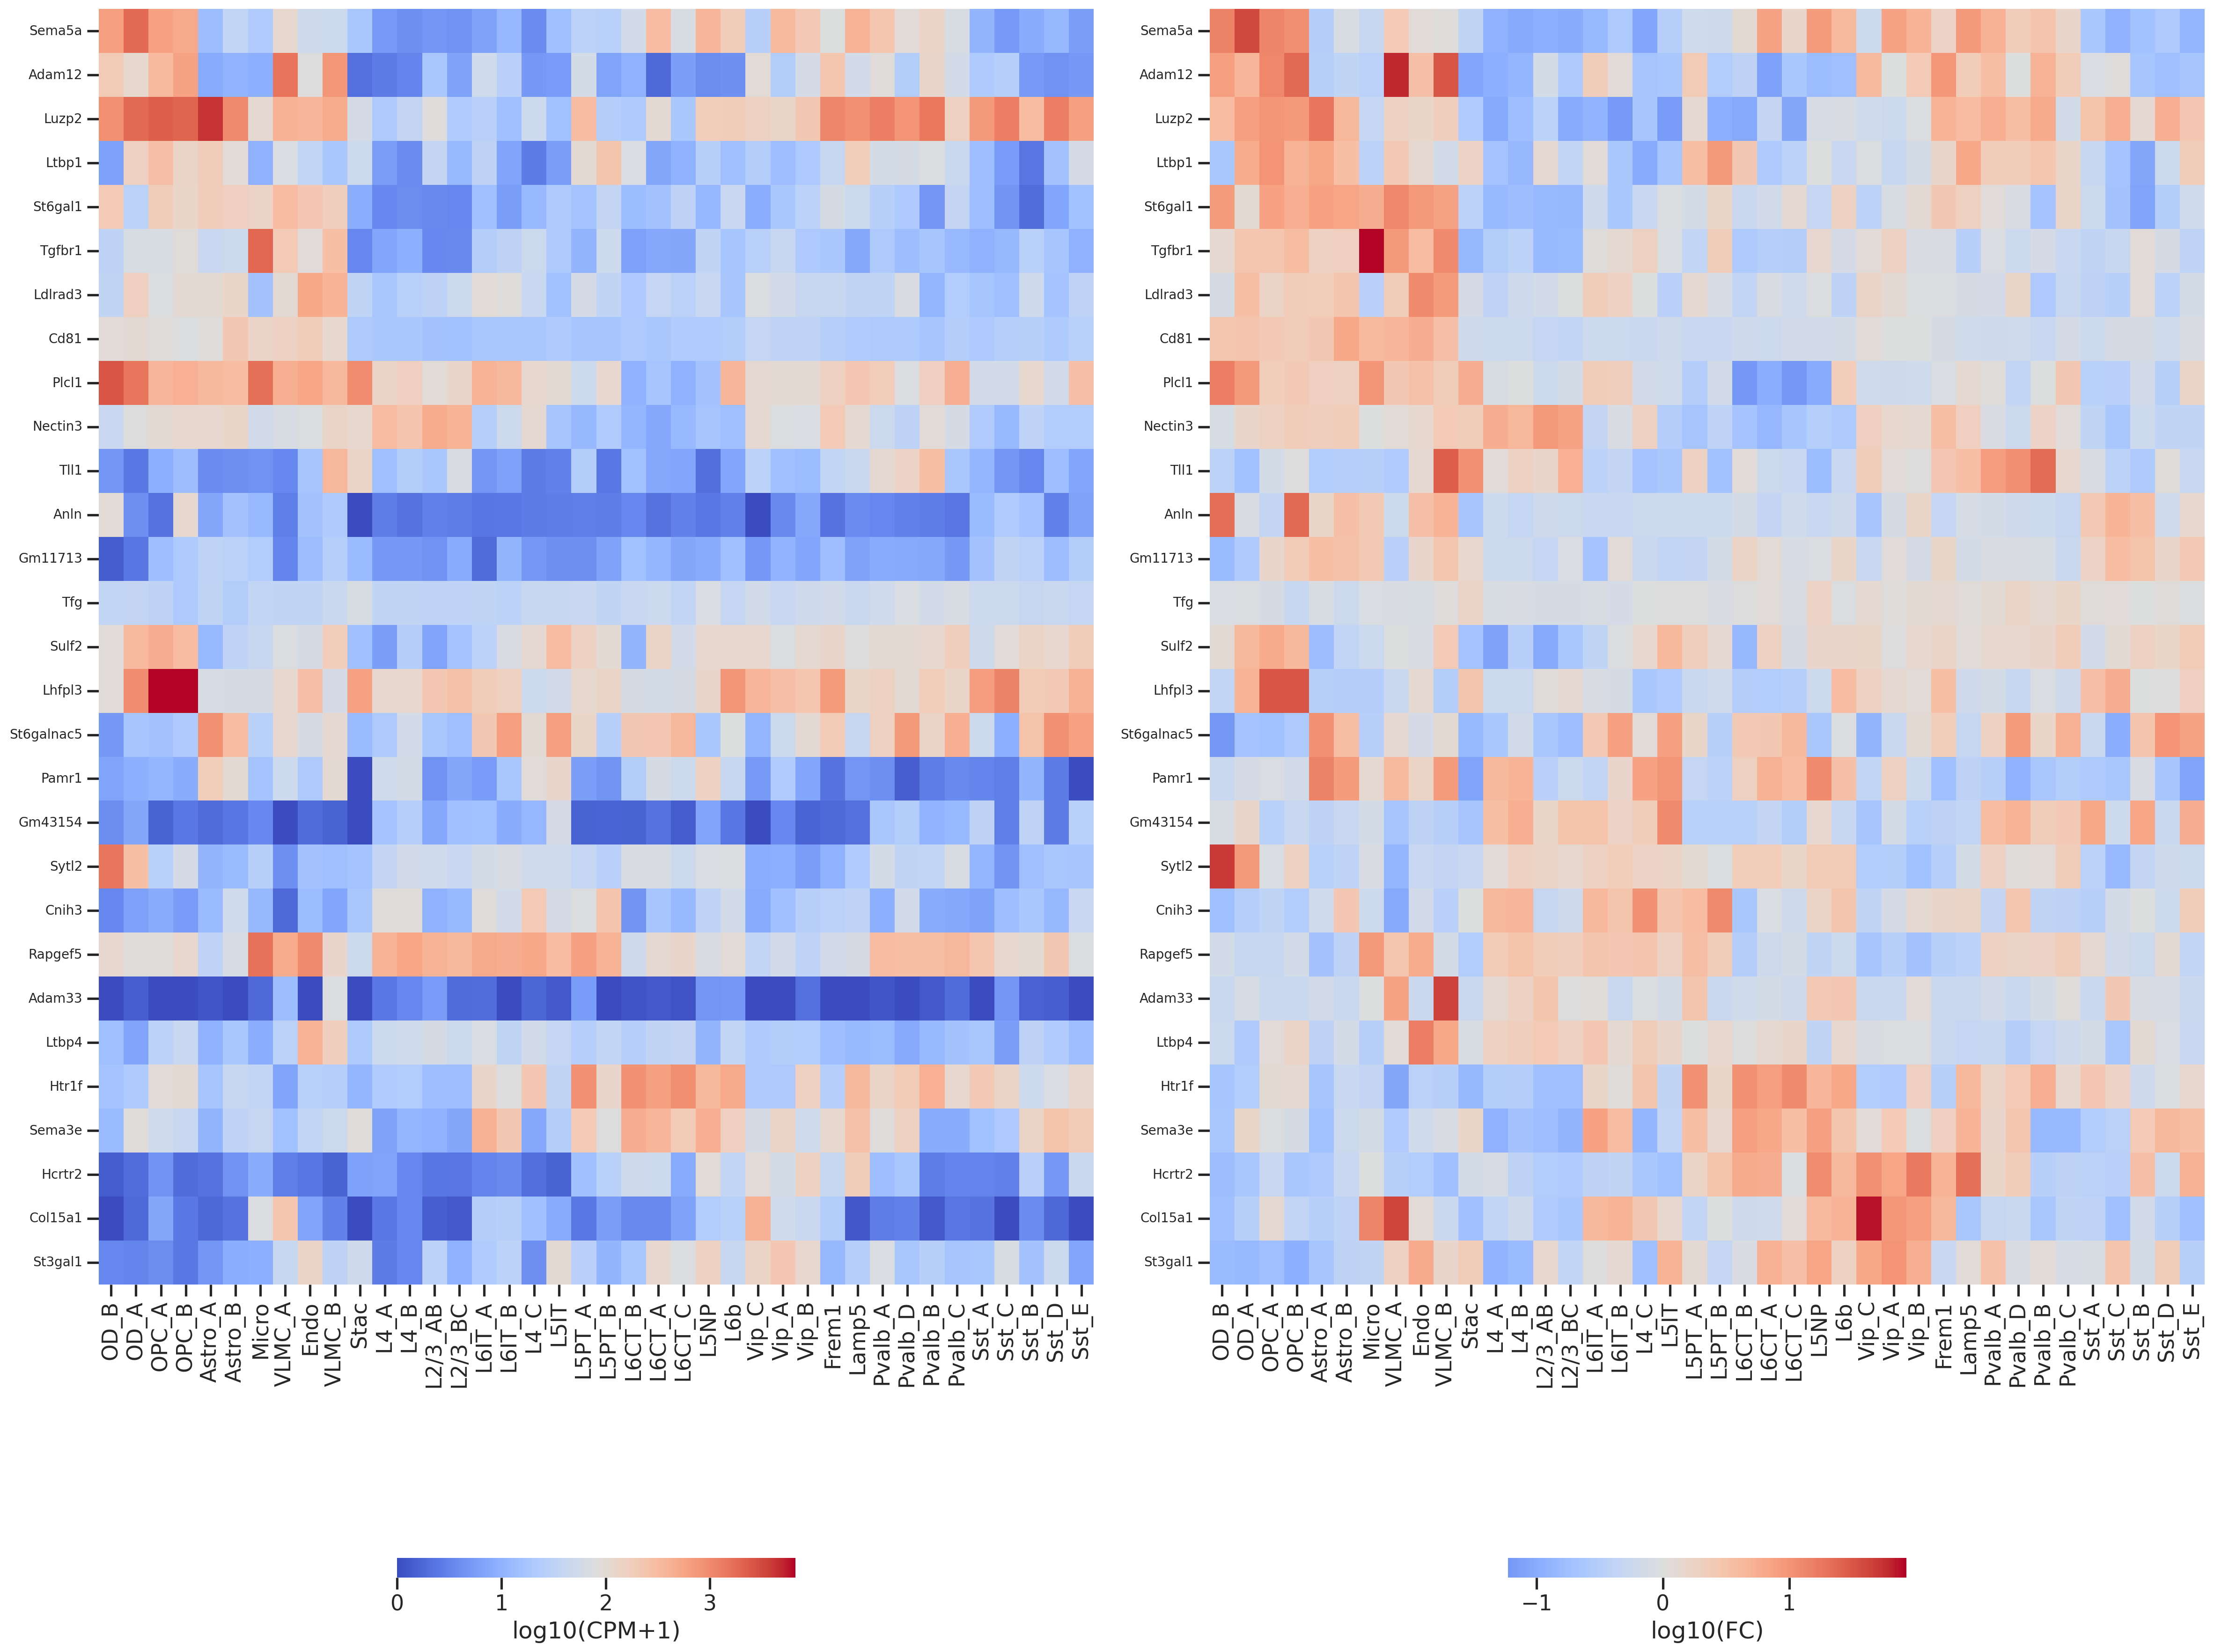

In [38]:
fig, axs = plt.subplots(1,2,figsize=(12*2,20))
ax = axs[0]
sns.heatmap(
    exp[rowidx,:][:,colidx],
    yticklabels=cnddts[rowidx],
    xticklabels=xclsts_short[colidx],
    cmap='coolwarm',
    cbar_kws=dict(shrink=0.4, label='log10(CPM+1)', location='bottom'),
    # vmax=3,
    ax=ax,
    )
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)

ax = axs[1]
sns.heatmap(
    lfc[rowidx,:][:,colidx],
    yticklabels=cnddts[rowidx],
    xticklabels=xclsts_short[colidx],
    cmap='coolwarm',
    cbar_kws=dict(shrink=0.4, label='log10(FC)', location='bottom'),
    center=0,
    ax=ax,
    )
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
fig.tight_layout()
plt.show()